## 1. Load the data

In [1]:
import pandas as pd

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

INPUT_CSV = "/home/sramkova/diploma_thesis_data/FINAL_neighbourhood_both_days.csv"

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,attack_label,timestamp
0,0.04569,0.01362,0.00658,0.00002,0.79714,0.00000,0.00004,0.00012,0.00677,0.00010,...,34507,20,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,Normal,2019-03-19T10:10:49.194278Z
1,0.04569,0.01362,0.03575,0.00000,0.78674,0.00000,0.00001,0.00003,0.00122,0.00000,...,851,6,tcp,http,SF,orig_reg_or_dyn,resp_80,No,Normal,2019-03-19T10:58:49.150898Z
2,0.04569,0.01362,0.05079,0.00000,0.79077,0.00000,0.00001,0.00003,0.00122,0.00000,...,799,5,tcp,http,SF,orig_reg_or_dyn,resp_80,No,Normal,2019-03-19T11:23:34.113264Z
3,0.04569,0.01362,0.09455,0.00000,0.80233,0.00000,0.00001,0.00002,0.00122,0.00000,...,164,3,tcp,http,S1,orig_reg_or_dyn,resp_80,No,Normal,2019-03-19T12:35:34.077791Z
4,0.04569,0.01362,0.09045,0.00000,0.80108,0.00000,0.00001,0.00003,0.00122,0.00000,...,799,5,tcp,http,SF,orig_reg_or_dyn,resp_80,No,Normal,2019-03-19T12:28:49.134506Z


In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,attack_label,timestamp
0,0.04572,0.04754,0.00936,0.00405,0.77317,0.00000,0.00001,0.00003,0.00122,0.00001,...,2175,4,tcp,http,SF,orig_reg_or_dyn,resp_80,No,Normal,2019-03-19T10:15:23.70562Z
1,0.04572,0.25924,0.18505,0.00000,0.76344,0.00000,0.00000,0.00001,0.00122,0.00000,...,480,2,tcp,none,RSTOS0,orig_reg_or_dyn,resp_80,No,Normal,2019-03-19T15:04:28.325723Z
2,0.04567,0.01362,0.13157,0.00006,0.82897,0.00000,0.00001,0.00003,0.00122,0.00000,...,1290,4,tcp,http,RSTO,orig_reg_or_dyn,resp_80,No,Normal,2019-03-19T13:36:28.162913Z
3,0.02044,0.03237,0.76812,0.00000,0.56107,0.00000,0.00000,0.00001,0.14782,0.00000,...,0,0,tcp,none,S0,orig_reg_or_dyn,resp_reg,Yes,Scan,2019-03-20T08:03:48.676571Z
4,0.02044,0.03237,0.76715,0.00000,0.56105,0.00000,0.00000,0.00001,0.00340,0.00000,...,0,0,tcp,none,S0,orig_reg_or_dyn,resp_well_known,Yes,Scan,2019-03-20T08:02:13.560971Z


## 3. K-prototypes

(https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
)

(https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py)

### Parameters of kmodes.kprototypes.KPrototypes: 

```
num_dissim: 
        Dissimilarity function used by the algorithm for numerical variables. 
        (default is euclidian_dissim)
        
cat_dissim: 
        For categorical variables. 
        (default is matching_dissim)
        
init: 
        Initial centroids.
        
gamma: 
        Weighing factor determining relative importance of numerical vs. categorical attributes. 
        (default is None, calculated from data)
        
n_jobs: 
        Number of jobs to use for the computation - each n_init runs in parallel. If -1 all CPUs are used. 
        (default is 1)
```

### Attributes: 

```
cluster_centroids_

labels_:
        Labels of each point (cluster l affiliation)
        
cost_: 
        Sum distance of all points to their respective cluster centroids.

n_iter_:
        The number of iterations the algorithm ran for.

epoch_costs_:
        Cost at each epoch.

gamma:
        The (potentially calculated) weighing factor.
```

In [4]:
import numpy as np
from kmodes.kprototypes import KPrototypes

In [5]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 472345 rows and 339 columns


In [6]:
# selected_df.info()

In [7]:
# Inspect the categorical variables
selected_df.select_dtypes('object').nunique()

orig_orig_connection.protocol_mode           3
orig_orig_connection.service_mode            8
orig_orig_connection.conn_state_mode        12
orig_resp_connection.protocol_mode           4
orig_resp_connection.service_mode            9
orig_resp_connection.conn_state_mode        12
resp_orig_connection.protocol_mode           4
resp_orig_connection.service_mode            8
resp_orig_connection.conn_state_mode        12
resp_resp_connection.protocol_mode           3
resp_resp_connection.service_mode            8
resp_resp_connection.conn_state_mode        12
uid                                     472345
originated_ip                              275
responded_ip                              2678
protocol                                     3
service                                     14
conn_state                                  13
orig_p_cat                                   2
resp_p_cat                                  10
attacker_label                               2
attack_label 

In [8]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_ip_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,resp_orig_similar_ssl_validation_status_count,resp_orig_similar_files_source_count,resp_orig_similar_file_md5_count,resp_resp_total,resp_resp_connection.time_mean,resp_resp_connect

In [9]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['originated_ip_num', 
                       'responded_ip_num',
                       'connection.time', 
                       'connection.duration', 
                       # originator details
                       # 'connection.orig_p', 
                       'connection.orig_bytes', 
                       'connection.orig_pkts', 
                       'connection.orig_ip_bytes', 
                       # responder details
                       # 'connection.resp_p', 
                       'connection.resp_bytes', 
                       'connection.resp_pkts',
                       'connection.resp_ip_bytes']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            # 'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            # 'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            # 'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            # 'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            # 'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            # 'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            # 'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            # 'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# labels and time in different format:
BACKUP_COLS = ['attacker_label', 'attack_label', 'connection.ts']

# OHE categories of original connection:
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_3389', 
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

OHE_PROTO_CAT_COLS = ['connection.proto_icmp', 
                      'connection.proto_tcp',
                      'connection.proto_udp']

OHE_SERVICE_CAT_COLS = ['connection.service_dce_rpc', 
                        'connection.service_dhcp',
                        'connection.service_dns', 
                        'connection.service_http',
                        'connection.service_imap', 
                        'connection.service_krb_tcp',
                        'connection.service_none', 
                        'connection.service_ntp',
                        'connection.service_pop3', 
                        'connection.service_smtp',
                        'connection.service_socks', 
                        'connection.service_ssh',
                        'connection.service_ssl', 
                        'connection.service_ssl,imap']

OHE_CONN_STATE_CAT_COLS = ['connection.conn_state_OTH', 
                           'connection.conn_state_REJ',
                           'connection.conn_state_RSTO', 
                           'connection.conn_state_RSTOS0',
                           'connection.conn_state_RSTR', 
                           'connection.conn_state_RSTRH',
                           'connection.conn_state_S0', 
                           'connection.conn_state_S1',
                           'connection.conn_state_S2', 
                           'connection.conn_state_S3',
                           'connection.conn_state_SF', 
                           'connection.conn_state_SH',
                           'connection.conn_state_SHR']

# OHE categories of neighbrouhoods:
ORIG_ORIG_OHE_CAT_COLS = ['orig_orig_connection.protocol_mode_icmp',
                          'orig_orig_connection.protocol_mode_tcp',
                          'orig_orig_connection.protocol_mode_udp'
                          
                          'orig_orig_connection.service_mode_dhcp',
                          'orig_orig_connection.service_mode_dns',
                          'orig_orig_connection.service_mode_http',
                          'orig_orig_connection.service_mode_none',
                          'orig_orig_connection.service_mode_ntp',
                          'orig_orig_connection.service_mode_smtp',
                          'orig_orig_connection.service_mode_ssh',
                          'orig_orig_connection.service_mode_ssl',
                          
                          'orig_orig_connection.conn_state_mode_OTH',
                          'orig_orig_connection.conn_state_mode_REJ',
                          'orig_orig_connection.conn_state_mode_RSTO',
                          'orig_orig_connection.conn_state_mode_RSTR',
                          'orig_orig_connection.conn_state_mode_RSTRH',
                          'orig_orig_connection.conn_state_mode_S0',
                          'orig_orig_connection.conn_state_mode_S1',
                          'orig_orig_connection.conn_state_mode_S2',
                          'orig_orig_connection.conn_state_mode_S3',
                          'orig_orig_connection.conn_state_mode_SF',
                          'orig_orig_connection.conn_state_mode_SH',
                          'orig_orig_connection.conn_state_mode_SHR']

ORIG_RESP_OHE_CAT_COLS = ['orig_resp_connection.protocol_mode_-',
                          'orig_resp_connection.protocol_mode_icmp',
                          'orig_resp_connection.protocol_mode_tcp',
                          'orig_resp_connection.protocol_mode_udp',
                          
                          'orig_resp_connection.service_mode_-',
                          'orig_resp_connection.service_mode_dhcp',
                          'orig_resp_connection.service_mode_dns',
                          'orig_resp_connection.service_mode_http',
                          'orig_resp_connection.service_mode_none',
                          'orig_resp_connection.service_mode_ntp',
                          'orig_resp_connection.service_mode_socks',
                          'orig_resp_connection.service_mode_ssh',
                          'orig_resp_connection.service_mode_ssl',
                          'orig_resp_connection.conn_state_mode_-',
                          
                          'orig_resp_connection.conn_state_mode_OTH',
                          'orig_resp_connection.conn_state_mode_REJ',
                          'orig_resp_connection.conn_state_mode_RSTO',
                          'orig_resp_connection.conn_state_mode_RSTR',
                          'orig_resp_connection.conn_state_mode_S0',
                          'orig_resp_connection.conn_state_mode_S1',
                          'orig_resp_connection.conn_state_mode_S2',
                          'orig_resp_connection.conn_state_mode_S3',
                          'orig_resp_connection.conn_state_mode_SF',
                          'orig_resp_connection.conn_state_mode_SH',
                          'orig_resp_connection.conn_state_mode_SHR']

RESP_ORIG_OHE_CAT_COLS = ['resp_orig_connection.protocol_mode_-',
                          'resp_orig_connection.protocol_mode_icmp',
                          'resp_orig_connection.protocol_mode_tcp',
                          'resp_orig_connection.protocol_mode_udp',
                          
                          'resp_orig_connection.service_mode_-',
                          'resp_orig_connection.service_mode_dhcp',
                          'resp_orig_connection.service_mode_dns',
                          'resp_orig_connection.service_mode_http',
                          'resp_orig_connection.service_mode_none',
                          'resp_orig_connection.service_mode_ntp',
                          'resp_orig_connection.service_mode_smtp',
                          'resp_orig_connection.service_mode_ssl',
                          
                          'resp_orig_connection.conn_state_mode_-',
                          'resp_orig_connection.conn_state_mode_OTH',
                          'resp_orig_connection.conn_state_mode_REJ',
                          'resp_orig_connection.conn_state_mode_RSTO',
                          'resp_orig_connection.conn_state_mode_RSTR',
                          'resp_orig_connection.conn_state_mode_S0',
                          'resp_orig_connection.conn_state_mode_S1',
                          'resp_orig_connection.conn_state_mode_S2',
                          'resp_orig_connection.conn_state_mode_S3',
                          'resp_orig_connection.conn_state_mode_SF',
                          'resp_orig_connection.conn_state_mode_SH',
                          'resp_orig_connection.conn_state_mode_SHR']

RESP_RESP_OHE_CAT_COLS = ['resp_resp_connection.protocol_mode_icmp',
                          'resp_resp_connection.protocol_mode_tcp',
                          'resp_resp_connection.protocol_mode_udp',
                          
                          'resp_resp_connection.service_mode_dhcp',
                          'resp_resp_connection.service_mode_dns',
                          'resp_resp_connection.service_mode_http',
                          'resp_resp_connection.service_mode_none',
                          'resp_resp_connection.service_mode_ntp',
                          'resp_resp_connection.service_mode_socks',
                          'resp_resp_connection.service_mode_ssh',
                          'resp_resp_connection.service_mode_ssl',
                          
                          'resp_resp_connection.conn_state_mode_OTH',
                          'resp_resp_connection.conn_state_mode_REJ',
                          'resp_resp_connection.conn_state_mode_RSTO',
                          'resp_resp_connection.conn_state_mode_RSTR',
                          'resp_resp_connection.conn_state_mode_RSTRH',
                          'resp_resp_connection.conn_state_mode_S0',
                          'resp_resp_connection.conn_state_mode_S1',
                          'resp_resp_connection.conn_state_mode_S2',
                          'resp_resp_connection.conn_state_mode_S3',
                          'resp_resp_connection.conn_state_mode_SF',
                          'resp_resp_connection.conn_state_mode_SH',
                          'resp_resp_connection.conn_state_mode_SHR']                                                                                              

In [10]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                        # categorical
                        ['orig_p_cat', 
                         'resp_p_cat',
                         'protocol',
                         'service', 
                         'conn_state'] + 
                        CONN_APP_STATS + 
                        
                        # originator neighbourhood
                        ORIG_ORIG_NUMERICAL_COLS + 
                        ORIG_ORIG_PORTS_COLS + 
                        ORIG_ORIG_APP_STATS_COLS + 
                        ORIG_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood 2
                        ORIG_RESP_NUMERICAL_COLS + 
                        ORIG_RESP_PORTS_COLS + 
                        ORIG_RESP_APP_STATS_COLS + 
                        ORIG_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 2
                        ORIG_RESP_CATEGORICAL_COLS + 
                        
                        # responder neighbourhood
                        RESP_ORIG_NUMERICAL_COLS + 
                        RESP_ORIG_PORTS_COLS + 
                        RESP_ORIG_APP_STATS_COLS + 
                        RESP_ORIG_SIMILAR_COLS + 
                        # responder categorical neighbourhood 
                        RESP_ORIG_CATEGORICAL_COLS + 
                        
                        # responder neighbourhood 2
                        RESP_RESP_NUMERICAL_COLS + 
                        RESP_RESP_PORTS_COLS + 
                        RESP_RESP_APP_STATS_COLS + 
                        RESP_RESP_SIMILAR_COLS + 
                        # responder categorical neighbourhood 2
                        RESP_RESP_CATEGORICAL_COLS, axis=1)

In [11]:
df.head()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_bytes,connection.orig_pkts,connection.orig_ip_bytes,connection.resp_bytes,connection.resp_pkts,connection.resp_ip_bytes,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_c

In [12]:
df.columns

Index(['originated_ip_num', 'responded_ip_num', 'connection.time',
       'connection.duration', 'connection.orig_bytes', 'connection.orig_pkts',
       'connection.orig_ip_bytes', 'connection.resp_bytes',
       'connection.resp_pkts', 'connection.resp_ip_bytes',
       ...
       'resp_resp_similar_http_user_agent_count',
       'resp_resp_similar_ssl_version_count',
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode'],
      dtype='object', length=184)

In [13]:
# Get the position of categorical columns
cat_cols_i_list = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns         : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns indexes : {}'.format(cat_cols_i_list))

Categorical columns         : ['orig_p_cat', 'resp_p_cat', 'protocol', 'service', 'conn_state', 'orig_orig_connection.protocol_mode', 'orig_orig_connection.service_mode', 'orig_orig_connection.conn_state_mode', 'orig_resp_connection.protocol_mode', 'orig_resp_connection.service_mode', 'orig_resp_connection.conn_state_mode', 'resp_orig_connection.protocol_mode', 'resp_orig_connection.service_mode', 'resp_orig_connection.conn_state_mode', 'resp_resp_connection.protocol_mode', 'resp_resp_connection.service_mode', 'resp_resp_connection.conn_state_mode']
Categorical columns indexes : [10, 11, 12, 13, 14, 58, 59, 60, 99, 100, 101, 140, 141, 142, 181, 182, 183]


In [14]:
# Convert dataframe to matrix
df_matrix = df.to_numpy()
df_matrix

array([[0.0457207757554951, 0.0475358155595201, 0.0093568035959296, ...,
        'tcp', 'http', 'SF'],
       [0.0457207760275853, 0.2592353140906388, 0.1850517759563044, ...,
        'tcp', 'http', 'RSTO'],
       [0.0456672074564273, 0.0136217007978715, 0.1315655621659838, ...,
        'tcp', 'ssl', 'RSTO'],
       ...,
       [0.3668643378087655, 0.0323719919622737, 0.7666180545913407, ...,
        'tcp', 'none', 'S0'],
       [0.0457384629778772, 0.5760870884619269, 0.1167552996041521, ...,
        'udp', 'ntp', 'SF'],
       [0.0457564386158537, 0.0136217007978715, 0.8168156819438636, ...,
        'tcp', 'ssl', 'RSTO']], dtype=object)

In [15]:
from datetime import datetime

# Choose optimal K using Elbow method
cost = []
print_info = []
computed_clusters = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
#for cluster in range(1, 15):
for cluster in range(10, 11):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0)
        kprototype.fit_predict(X=df_matrix, categorical=cat_cols_i_list)
        computed_clusters.append(kprototype)
        cost.append(kprototype.cost_)
        print_str = 'Cluster initiation: {:2} ({}), gamma: {}'.format(cluster, 
                                                                      datetime.now().strftime("%H:%M:%S"), 
                                                                      kprototype.gamma)
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 17:50:20.
Cluster initiation: 10 (18:29:09), gamma: 0.08900004897193284
Done at 18:29:09.


In [16]:
print_info

['Cluster initiation: 10 (18:29:09), gamma: 0.08900004897193284']

In [17]:
cost

[606883.5229079641]

In [18]:
#df_cost = pd.DataFrame({'Cluster': range(1, 15), 'Cost': cost})
df_cost = pd.DataFrame({'Cluster': range(10, 11), 'Cost': cost})

In [19]:
df_cost

,Cluster,Cost
0,10,606883.52291


/home/sramkova/.local/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


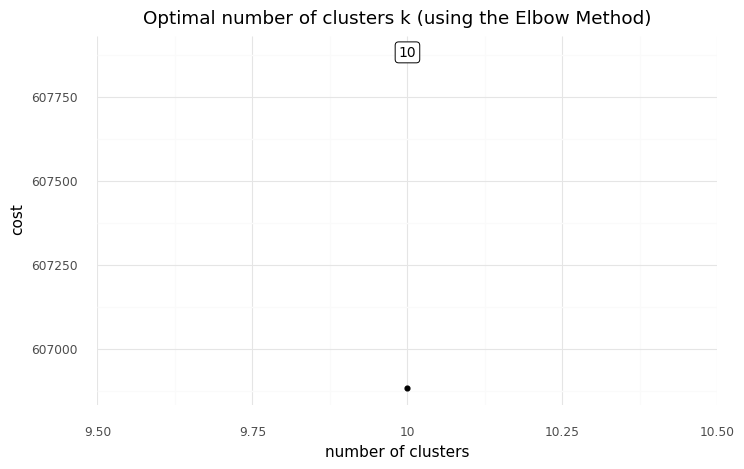

<ggplot: (8751990913335)>

In [20]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

Optimal `k` will be chosen as 10.

In [21]:
# Fit the cluster
OPTIMAL_K = 9 ####################### ----- !!!! change

# kprototype = KPrototypes(n_jobs = -1, n_clusters = OPTIMAL_K, init = 'Huang', random_state = 0)
# kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

#kprototype = computed_clusters[OPTIMAL_K]
kprototype = computed_clusters[0]

In [22]:
# Cluster centorid
kprototype.cluster_centroids_

array([['0.22930828563417766', '0.18324146852394702',
        '0.8493031062248931', ..., 'tcp', 'none', 'S0'],
       ['0.2684201973852286', '0.03199941919947073',
        '0.8398449645549304', ..., 'tcp', 'none', 'S0'],
       ['0.043023678240444105', '0.05298730771309792',
        '0.11940531189910789', ..., 'udp', 'dns', 'SF'],
       ...,
       ['0.04247426028940495', '0.08845494933315505',
        '0.8431423439464167', ..., 'udp', 'dns', 'SF'],
       ['0.21594998784459646', '0.032371704851780786',
        '0.7714331227839502', ..., 'tcp', 'none', 'SF'],
       ['0.04653907174739648', '0.1820719896943949',
        '0.8603879976626875', ..., 'tcp', 'ssl', 'SF']], dtype='<U32')

In [23]:
# Check the iteration of the clusters created
kprototype.n_iter_

22

In [24]:
# Check the cost of the clusters created
kprototype.cost_

606883.5229079641

In [25]:
# df.drop('Cluster Labels', axis=1, inplace=True)
# df.drop('cluster', axis=1, inplace=True)
# df.head()

In [26]:
# Add cluster labels to original dataframe
df['cluster'] = kprototype.labels_
df['cluster_cat'] = df['cluster']

# (groupby works only on category type)
df['cluster_cat'] = df['cluster_cat'].astype('category')

In [27]:
df.head()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_bytes,connection.orig_pkts,connection.orig_ip_bytes,connection.resp_bytes,connection.resp_pkts,connection.resp_ip_bytes,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_c

In [28]:
df.columns

Index(['originated_ip_num', 'responded_ip_num', 'connection.time',
       'connection.duration', 'connection.orig_bytes', 'connection.orig_pkts',
       'connection.orig_ip_bytes', 'connection.resp_bytes',
       'connection.resp_pkts', 'connection.resp_ip_bytes',
       ...
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode', 'cluster', 'cluster_cat'],
      dtype='object', length=186)

In [29]:
df['cluster'].value_counts()

3    88942
0    78371
6    77087
7    52301
1    51323
9    41711
2    41274
8    19886
4    11993
5     9457
Name: cluster, dtype: int64

In [32]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

,cluster_cat,cluster,protocol,service,conn_state,orig_p_cat,resp_p_cat,connection.time,connection.duration,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_bytes,connection.resp_ip_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count
0,0,78371,tcp,none,S0,orig_reg_or_dyn,resp_80,0.84930,0.00085,0.00000,0.00006,0.00015,0.00012,0.00014,0.00021,0.00023,0.00011,0.15624,0.00014,0.00170
1,1,51323,tcp,none,S0,orig_reg_or_dyn,resp_reg,0.83984,0.00065,0.00000,0.00002,0.00005,0.00000,0.00001,0.00009,0.00019,0.00002,0.05214,0.11652,0.00100
2,2,41274,udp,dns,SF,orig_reg_or_dyn,resp_53,0.11941,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00001,0.94682,0.00000,0.00000,0.00000,0.00000
3,3,88942,tcp,ssl,SF,orig_reg_or_dyn,resp_443,0.11855,0.00071,0.00000,0.00014,0.00041,0.00072,0.00066,0.00048,0.00004,0.00016,0.16498,0.40521,0.00620
4,4,11993,tcp,none,S0,orig_reg_or_dyn,resp_reg,0.01056,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,0.00025,0.00025,0.00584,0.00175,0.00002
5,5,9457,tcp,ssl,SF,orig_reg_or_dyn,resp_443,0.77788,0.00008,0.00000,0.00001,0.00003,0.00001,0.00001,0.00003,0.00000,0.00000,0.00360,0.76039,0.00568
6,6,77087,tcp,none,S0,orig_reg_or_dyn,resp_reg,0.80641,0.00003,0.00000,0.00001,0.00004,0.00000,0.00000,0.00001,0.00004,0.00008,0.00920,0.00296,0.00008
7,7,52301,udp,dns,SF,orig_reg_or_dyn,resp_53,0.84314,0.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00001,0.99398,0.00000,0.00000,0.00000,0.00000
8,8,19886,tcp,none,SF,orig_reg_or_dyn,resp_22,0.77143,0.00030,0.00000,0.00003,0.00006,0.00000,0.00001,0.00012,0.00000,0.93729,0.00000,0.02937,0.00012
9,9,41711,tcp,ssl,SF,orig_reg_or_dyn,resp_443,0.86039,0.00137,0.00024,0.00010,0.00019,0.00015,0.00018,0.00023,0.00000,0.00000,0.00065,0.96984,0.01120


In [33]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'orig_orig_total': 'mean', 
        'orig_orig_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.service_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.time_mean': 'mean',
        'orig_orig_connection.duration_mean': 'mean', 
        'orig_orig_connection.orig_bytes_mean': 'mean', 
        'orig_orig_connection.orig_pkts_mean': 'mean',
        'orig_orig_connection.resp_bytes_mean': 'mean',
        'orig_orig_connection.resp_pkts_mean': 'mean'
).reset_index()

,cluster_cat,cluster,orig_orig_total,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean
0,0,78371,0.09348,tcp,none,S0,0.85498,0.00096,0.00003,0.00045,0.00063,0.00019
1,1,51323,0.31490,tcp,none,S0,0.84598,0.00081,0.00001,0.00020,0.00002,0.00010
2,2,41274,0.01247,udp,dns,SF,0.11526,0.00027,0.00017,0.00051,0.00171,0.00016
3,3,88942,0.00675,tcp,ssl,SF,0.11443,0.00074,0.00012,0.00119,0.00448,0.00044
4,4,11993,0.45727,tcp,none,S0,0.01020,0.00000,0.00000,0.00002,0.00000,0.00000
5,5,9457,0.64848,tcp,ssl,SF,0.78610,0.00009,0.00000,0.00010,0.00004,0.00003
6,6,77087,0.65845,tcp,none,S0,0.81367,0.00008,0.00000,0.00013,0.00000,0.00001
7,7,52301,0.04296,udp,dns,SF,0.84910,0.00033,0.00002,0.00021,0.00035,0.00008
8,8,19886,0.64291,tcp,none,SF,0.77987,0.00032,0.00001,0.00016,0.00002,0.00010
9,9,41711,0.02196,tcp,ssl,SF,0.86571,0.00120,0.01066,0.00043,0.00090,0.00018


In [34]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'orig_resp_total': 'mean', 
        'orig_resp_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'orig_resp_connection.service_mode': lambda x: x.value_counts().index[0],
        'orig_resp_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'orig_resp_connection.time_mean': 'mean',
        'orig_resp_connection.duration_mean': 'mean', 
        'orig_resp_connection.orig_bytes_mean': 'mean', 
        'orig_resp_connection.orig_pkts_mean': 'mean',
        'orig_resp_connection.resp_bytes_mean': 'mean',
        'orig_resp_connection.resp_pkts_mean': 'mean'
    }
).reset_index()

,cluster_cat,cluster,orig_resp_total,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean
0,0,78371,0.00046,-,-,-,0.85460,0.00028,0.00018,0.00013,0.00007,0.00001
1,1,51323,0.00051,-,-,-,0.84547,0.00014,0.00012,0.00009,0.00004,0.00004
2,2,41274,0.00136,icmp,none,OTH,0.11520,0.00007,0.00001,0.00008,0.00002,0.00006
3,3,88942,0.00046,-,-,-,0.11438,0.00004,0.00000,0.00005,0.00003,0.00003
4,4,11993,0.00086,tcp,none,SF,0.01025,0.00027,0.00000,0.00022,0.00000,0.00005
5,5,9457,0.00009,icmp,none,OTH,0.78553,0.00000,0.00000,0.00002,0.00000,0.00000
6,6,77087,0.00025,-,-,-,0.81315,0.00045,0.00001,0.00026,0.00000,0.00002
7,7,52301,0.04062,-,none,-,0.84867,0.00016,0.00001,0.00012,0.00003,0.00008
8,8,19886,0.00007,-,-,-,0.77949,0.00005,0.00000,0.00005,0.00000,0.00001
9,9,41711,0.00031,-,-,-,0.86530,0.00017,0.00001,0.00012,0.00001,0.00003


In [35]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'resp_orig_total': 'mean', 
        'resp_orig_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'resp_orig_connection.service_mode': lambda x: x.value_counts().index[0],
        'resp_orig_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'resp_orig_connection.time_mean': 'mean',
        'resp_orig_connection.duration_mean': 'mean', 
        'resp_orig_connection.orig_bytes_mean': 'mean', 
        'resp_orig_connection.orig_pkts_mean': 'mean',
        'resp_orig_connection.resp_bytes_mean': 'mean',
        'resp_orig_connection.resp_pkts_mean': 'mean'
    }
).reset_index()

,cluster_cat,cluster,resp_orig_total,resp_orig_connection.protocol_mode,resp_orig_connection.service_mode,resp_orig_connection.conn_state_mode,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean
0,0,78371,0.00116,-,-,-,0.85460,0.00088,0.00025,0.00037,0.00019,0.00037
1,1,51323,0.01591,udp,dns,SF,0.84547,0.00007,0.00000,0.00003,0.00002,0.00001
2,2,41274,0.00121,udp,dns,SF,0.11519,0.00000,0.00000,0.00002,0.00000,0.00001
3,3,88942,0.00078,-,-,-,0.11438,0.00101,0.00042,0.00075,0.00048,0.00074
4,4,11993,0.00171,tcp,none,SF,0.01009,0.00025,0.00000,0.00006,0.00001,0.00003
5,5,9457,0.00028,udp,dns,SF,0.78564,0.00000,0.00000,0.00002,0.00000,0.00001
6,6,77087,0.00209,-,-,-,0.81317,0.00016,0.00000,0.00003,0.00001,0.00001
7,7,52301,0.00376,udp,dns,-,0.84866,0.00002,0.00000,0.00002,0.00000,0.00001
8,8,19886,0.08434,udp,dns,SF,0.77945,0.00073,0.00001,0.00010,0.00016,0.00004
9,9,41711,0.00026,-,-,-,0.86532,0.00009,0.00001,0.00004,0.00002,0.00002


In [36]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'resp_resp_total': 'mean', 
        'resp_resp_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'resp_resp_connection.service_mode': lambda x: x.value_counts().index[0],
        'resp_resp_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'resp_resp_connection.time_mean': 'mean',
        'resp_resp_connection.duration_mean': 'mean', 
        'resp_resp_connection.orig_bytes_mean': 'mean', 
        'resp_resp_connection.orig_pkts_mean': 'mean',
        'resp_resp_connection.resp_bytes_mean': 'mean',
        'resp_resp_connection.resp_pkts_mean': 'mean'
    }
).reset_index()

,cluster_cat,cluster,resp_resp_total,resp_resp_connection.protocol_mode,resp_resp_connection.service_mode,resp_resp_connection.conn_state_mode,resp_resp_connection.time_mean,resp_resp_connection.duration_mean,resp_resp_connection.orig_bytes_mean,resp_resp_connection.orig_pkts_mean,resp_resp_connection.resp_bytes_mean,resp_resp_connection.resp_pkts_mean
0,0,78371,0.07454,tcp,none,S0,0.85467,0.00111,0.00002,0.00044,0.00021,0.00025
1,1,51323,0.13760,tcp,none,S0,0.84555,0.00073,0.00000,0.00013,0.00000,0.00009
2,2,41274,0.04300,udp,dns,SF,0.11521,0.00000,0.00000,0.00001,0.00000,0.00001
3,3,88942,0.01274,tcp,ssl,RSTO,0.11439,0.00084,0.00006,0.00098,0.00111,0.00049
4,4,11993,0.40618,tcp,none,S0,0.01019,0.00000,0.00000,0.00002,0.00000,0.00000
5,5,9457,0.70658,tcp,ssl,SF,0.78576,0.00010,0.00000,0.00007,0.00001,0.00004
6,6,77087,0.32717,tcp,none,S0,0.81330,0.00007,0.00000,0.00009,0.00000,0.00001
7,7,52301,0.03447,udp,dns,SF,0.84874,0.00000,0.00000,0.00001,0.00000,0.00001
8,8,19886,0.24029,tcp,none,SF,0.77955,0.00033,0.00000,0.00013,0.00000,0.00011
9,9,41711,0.01740,tcp,ssl,SF,0.86537,0.00148,0.00255,0.00031,0.00017,0.00018


In [37]:
pd.DataFrame(kprototype.cluster_centroids_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183
0,0.22930828563417766,0.18324146852394702,0.8493031062248931,0.0008480758457834787,7.781257047852571e-07,0.00014873561656093736,6.177546506036948e-05,0.00011609657679574495,0.00020580839742229929,0.00013653886246538016,0.0002296767937119598,0.0001148383968559799,0.1562440188334971,0.0001403580406017532,0.0017001465784537647,0.09347786158106484,0.8549790844710522,0.0009613398475656777,0.000447183669377112,3.33786478580581e-05,0.0006306756870009306,0.0001862485497624039,0.07777069497836987,0.09240218418242863,0.03618827258949683,0.0001352767985657477,0.0013683817237684296,0.10225864338230116,0.034415418097349805,0.0030180070923282913,0.03721146852789969,0.04535484674484178,0.05721702746474034,0.05308989234619185,0.05496220708813719,0.00011145626809178213,0.08096021704214464,0.10357994732607172,0.005455022363008923,0.0017273798124228734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0004627510354363006,0.854596962645904,0.0002845646297434807,0.0001324273540640741,0.00018022525119860196,7.153950270250947e-05,1.4912970232314516e-05,0.025030517240644132,0.0003486301361628131,0.00044021385461458966,2.6790990813543993e-05,0.0001825322192920789,0.0002325840948981862,0.0027120795587241672,7.06375035472168e-06,0.0001939492924678769,0.0006411472333302249,0.0005179987456012695,0.00023353530272142547,0.0007524609579848103,8.8801968798021e-05,0.0031535697910536867,0.0028069123099571775,0.002136480425596703,8.506547915257761e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0011630916014416116,0.8545956338000974,0.0008790725147611901,0.0003711585004010521,0.00024879851848143427,0.00018709414693573776,0.00036920102062043493,0.0041132415265159985,0.0010909476371046298,0.00015949777341108318,7.326773969566583e-05,0.00027960919866228427,0.01577153244479117,0.001435952546695088,0.00025378212481326517,0.00020689139751037648,0.002639766531716267,0.00035066945876261683,0.0001931665470924815,0.0031587864903153237,7.625908870814565e-05,0.01702699600372518,0.044865054555761834,0.009998045406581326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0745407822194626,0.8546725896554717,0.0011109134563533302,0.0004388617085883666,2.2154489788987483e-05,0.00020665461587496953,0.00024538674370296585,0.20543642501078963,0.07387324849888026,0.028966922288430428,0.00018062903419658412,0.0018575203719316227,0.10240021776571048,0.08207487875081976,0.002444634976180226,0.021446708603949913,0.024131617340980974,0.05597215766360211,0.03565262895596942,0.00692213698570586,0.00030171003238972833,0.11308391786097143,0.06726131412671256,0.0019027351463743792,0.0049930630672881116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,orig_reg_or_dyn,resp_80,tcp,none,S0,tcp,none,S0,-,-,-,-,-,-,tcp,none,S0
1,0.2684201973852286,0.03199941919947073,0.8398449645549304,0.000654746518169581,2.897190938550686e-07,5.3272699871398534e-05,2.306352743066276e-05,2.5031503309249677e-06,8.660024251681405e-05,5.051016366526433e-06,0.0001948444167332385,1.9484441673323852e-05,0.052140365917814624,0.11651696120647663,0.0009958376361475362,0.31490471521718993,0.8459826289404825,0.0008124634825267912,0.00020095533882305572,1.1059502865585608e-05,1.5546725106118896e-05,9.744963382070269e-05,0.01978494116110023,0.31466228221709447,0.18450142561159985,0.03522248756306546,0.0029000306318859447,0.011318787078801316,0.0009130361845091087,0.001355269579038375,0.18

In [38]:
centroids = pd.DataFrame(kprototype.cluster_centroids_, columns = [CONN_NUMERICAL_COLS + 
                                                                    # categorical
                                                                    ['orig_p_cat', 
                                                                     'resp_p_cat',
                                                                     'protocol',
                                                                     'service', 
                                                                     'conn_state'] + 
                                                                    CONN_APP_STATS + 

                                                                    # originator neighbourhood
                                                                    ORIG_ORIG_NUMERICAL_COLS + 
                                                                    ORIG_ORIG_PORTS_COLS + 
                                                                    ORIG_ORIG_APP_STATS_COLS + 
                                                                    ORIG_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood 2
                                                                    ORIG_RESP_NUMERICAL_COLS + 
                                                                    ORIG_RESP_PORTS_COLS + 
                                                                    ORIG_RESP_APP_STATS_COLS + 
                                                                    ORIG_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 2
                                                                    ORIG_RESP_CATEGORICAL_COLS + 

                                                                    # responder neighbourhood
                                                                    RESP_ORIG_NUMERICAL_COLS + 
                                                                    RESP_ORIG_PORTS_COLS + 
                                                                    RESP_ORIG_APP_STATS_COLS + 
                                                                    RESP_ORIG_SIMILAR_COLS + 
                                                                    # responder categorical neighbourhood 
                                                                    RESP_ORIG_CATEGORICAL_COLS + 

                                                                    # responder neighbourhood 2
                                                                    RESP_RESP_NUMERICAL_COLS + 
                                                                    RESP_RESP_PORTS_COLS + 
                                                                    RESP_RESP_APP_STATS_COLS + 
                                                                    RESP_RESP_SIMILAR_COLS + 
                                                                    # responder categorical neighbourhood 2
                                                                    RESP_RESP_CATEGORICAL_COLS])

# https://stackoverflow.com/questions/51148457/how-to-find-the-set-of-influential-features-in-clusters/53081779#53081779
centroids

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_bytes,connection.orig_pkts,connection.orig_ip_bytes,connection.resp_bytes,connection.resp_pkts,connection.resp_ip_bytes,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_c

In [39]:
from sklearn.decomposition import PCA

data_num_cols = selected_df.filter(CONN_NUMERICAL_COLS + 
                                   # categorical
                                   OHE_ORIG_P_CAT_COLS + 
                                   OHE_RESP_P_CAT_COLS + 
                                   OHE_PROTO_CAT_COLS + 
                                   OHE_SERVICE_CAT_COLS + 
                                   OHE_CONN_STATE_CAT_COLS + 
                                   
                                   CONN_APP_STATS + 
                                   
                                   # originator neighbourhood
                                   ORIG_ORIG_NUMERICAL_COLS + 
                                   ORIG_ORIG_PORTS_COLS + 
                                   ORIG_ORIG_APP_STATS_COLS + 
                                   ORIG_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_ORIG_OHE_CAT_COLS + 
                        
                                   # originator neighbourhood 2
                                   ORIG_RESP_NUMERICAL_COLS + 
                                   ORIG_RESP_PORTS_COLS + 
                                   ORIG_RESP_APP_STATS_COLS + 
                                   ORIG_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 2
                                   ORIG_RESP_OHE_CAT_COLS + 

                                   # responder neighbourhood
                                   RESP_ORIG_NUMERICAL_COLS + 
                                   RESP_ORIG_PORTS_COLS + 
                                   RESP_ORIG_APP_STATS_COLS + 
                                   RESP_ORIG_SIMILAR_COLS + 
                                   # responder categorical neighbourhood 
                                   RESP_ORIG_OHE_CAT_COLS + 

                                   # responder neighbourhood 2
                                   RESP_RESP_NUMERICAL_COLS + 
                                   RESP_RESP_PORTS_COLS + 
                                   RESP_RESP_APP_STATS_COLS + 
                                   RESP_RESP_SIMILAR_COLS + 
                                   # responder categorical neighbourhood 2
                                   RESP_RESP_OHE_CAT_COLS, axis=1)
n_components = len(data_num_cols.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [40]:
pca_X = pca.fit_transform(data_num_cols)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 302 principal components: 0.9999999999999997


In [49]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component: {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.9999041]
Variance Captured by First  10 Principal Components: [0.83906347]
Variance Captured by First   7 Principal Components: [0.78252654]
Variance Captured by First   5 Principal Components: [0.72321302]
Variance Captured by First   2 Principal Components: [0.58596703]
Variance Captured by the First Principal Component: [0.42355806]


In [42]:
pca_X['cluster'] = kprototype.labels_
pca_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,cluster
0,0.98641,1.86973,0.01884,-0.26587,0.21506,-1.02954,0.74425,-0.70105,1.40535,0.95853,0.23084,1.23323,-0.24443,0.38459,-0.14577,0.26321,0.18868,0.25371,-0.10352,-0.05847,0.15715,-0.07423,0.22882,-0.01515,-0.16527,0.16062,-0.32980,0.21684,0.14659,-0.16027,0.11875,-0.26000,-0.12359,0.00093,0.12037,-0.06961,-0.36905,-0.00787,-0.25067,-0.53737,0.00494,0.13614,-0.02956,-0.21397,0.20616,-0.19021,0.00818,-0.13731,0.07273,-0.08847,-0.05507,0.02286,0.01933,-0.10476,0.04509,-0.00565,0.09076,0.07817,-0.04060,-0.07818,0.00645,0.07414,-0.07795,-0.04112,0.03324,0.06123,-0.10548,-0.00177,-0.03653,0.03771,-0.07197,-0.02652,-0.06843,-0.00741,-0.03619,0.05719,0.03472,0.11635,0.03768,-0.09410,-0.01053,0.01245,0.03707,-0.03426,0.00304,0.04765,-0.03867,0.02736,-0.00871,-0.02233,0.02330,-0.03055,0.00650,0.08963,0.00439,0.02177,-0.00086,0.01199,-0.00895,0.00316,-0.00013,-0.00517,-0.00319,0.00644,0.01580,0.01150,-0.01015,0.00017,0.00726,-0.00184,0.00170,0.00186,0.00039,0.00918,-0.00224,-0.00037,0.00128,-0.00044,0.00402,-0.00028,-0.00173,0.00149,0.00350,0.00026,-0.00280,-0.00036,0.00601,0.00583,0.00374,-0.00465,-0.00408,-0.00155,0.00198,-0.00159,-0.00179,0.00288,0.00428,-0.00112,-0.00356,-0.00147,0.00221,0.00028,0.00132,-0.00916,-0.00008,-0.00227,-0.00086,0.00017,0.00039,0.00322,-0.00096,0.00066,0.00041,0.00526,0.00105,0.00062,0.00004,-0.00091,-0.00044,0.00041,0.00006,-0.00668,0.00028,0.00125,0.00184,0.00179,0.00040,-0.00052,0.00037,0.00015,-0.00044,-0.00078,-0.00020,0.00005,0.00015,0.00017,0.00096,-0.00232,-0.00009,0.00036,-0.00009,0.00002,-0.00015,-0.00068,-0.00038,-0.00014,0.00004,0.00095,0.00000,0.00082,-0.00091,-0.00123,0.00321,-0.00063,-0.00026,0.00019,0.00014,0.00113,-0.00016,0.00007,-0.00011,0.00030,-0.00004,0.00001,0.00001,-0.00027,0.00014,0.00012,-0.00016,0.00015,0.00002,-0.00001,-0.00007,0.00012,-0.00019,0.00003,-0.00016,0.00005,0.00017,0.00002,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,3
1,0.21271,1.71268,-0.33248,0.11317,0.25588,-1.06607,0.13050,-0.72057,0.95131,0.41875,0.27278,0.36214,-0.00652,0.36268,-0.18709,-0.43846,0.21296,0.12402,0.50769,0.54470,0.22529,0.24615,0.43651,0.45834,0.30237,0.64148,0.02680,-0.06627,-0.62093,-0.27287,0.27827,-0.29601,0.36321,-0.33543,0.19174,-0.52199,0.37168,0.15531,0.134

/home/sramkova/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


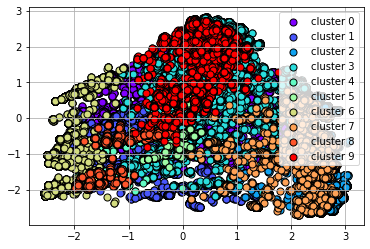

In [43]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)
# plt.rcParams["figure.figsize"] = (5.0,5.0) # https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

# colors = ['blue', 'lightblue', 'green', 'lightgreen', 'red', 'lightred', 'cyan', 'lightcyan', 'magenta', 'lightmagenta', 'yellow', 'lightyellow']
colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kprototype.labels_ == i, 0], pca_X_array[kprototype.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [44]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'o_ip_bytes',
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'attack_label']

In [45]:
# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,cluster,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
0,0.98641,1.86973,0.01884,-0.26587,0.21506,-1.02954,0.74425,-0.70105,1.40535,0.95853,0.23084,1.23323,-0.24443,0.38459,-0.14577,0.26321,0.18868,0.25371,-0.10352,-0.05847,0.15715,-0.07423,0.22882,-0.01515,-0.16527,0.16062,-0.32980,0.21684,0.14659,-0.16027,0.11875,-0.26000,-0.12359,0.00093,0.12037,-0.06961,-0.36905,-0.00787,-0.25067,-0.53737,0.00494,0.13614,-0.02956,-0.21397,0.20616,-0.19021,0.00818,-0.13731,0.07273,-0.08847,-0.05507,0.02286,0.01933,-0.10476,0.04509,-0.00565,0.09076,0.07817,-0.04060,-0.07818,0.00645,0.07414,-0.07795,-0.04112,0.03324,0.06123,-0.10548,-0.00177,-0.03653,0.03771,-0.07197,-0.02652,-0.06843,-0.00741,-0.03619,0.05719,0.03472,0.11635,0.03768,-0.09410,-0.01053,0.01245,0.03707,-0.03426,0.00304,0.04765,-0.03867,0.02736,-0.00871,-0.02233,0.02330,-0.03055,0.00650,0.08963,0.00439,0.02177,-0.00086,0.01199,-0.00895,0.00316,-0.00013,-0.00517,-0.00319,0.00644,0.01580,0.01150,-0.01015,0.00017,0.00726,-0.00184,0.00170,0.00186,0.00039,0.00918,-0.00224,-0.00037,0.00128,-0.00044,0.00402,-0.00028,-0.00173,0.00149,0.00350,0.00026,-0.00280,-0.00036,0.00601,0.00583,0.00374,-0.00465,-0.00408,-0.00155,0.00198,-0.00159,-0.00179,0.00288,0.00428,-0.00112,-0.00356,-0.00147,0.00221,0.00028,0.00132,-0.00916,-0.00008,-0.00227,-0.00086,0.00017,0.00039,0.00322,-0.00096,0.00066,0.00041,0.00526,0.00105,0.00062,0.00004,-0.00091,-0.00044,0.00041,0.00006,-0.00668,0.00028,0.00125,0.00184,0.00179,0.00040,-0.00052,0.00037,0.00015,-0.00044,-0.00078,-0.00020,0.00005,0.00015,0.00017,0.00096,-0.00232,-0.00009,0.00036,-0.00009,0.00002,-0.00015,-0.00068,-0.00038,-0.00014,0.00004,0.00095,0.00000,0.00082,-0.00091,-0.00123,0.00321,-0.00063,-0.00026,0.00019,0.00014,0.00113,-0.00016,0.00007,-0.00011,0.00030,-0.00004,0.00001,0.00001,-0.00027,0.00014,0.00012,-0.00016,0.00015,0.00002,-0.00001,-0.00007,0.00012,-0.00019,0.00003,-0.00016,0.00005,0.00017,0.00002,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0

In [47]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

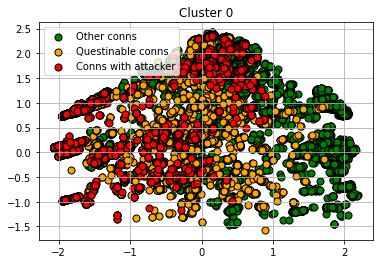

Total num of conns: 78371

Attacker conns ratio:
Yes    53549
No     24822
Name: attacker_label, dtype: int64

Attack conns ratio:
Scan             27114
Normal           24822
Not_Specified    21454
Scan,Snmp         2299
Web               2281
Web,Scan           109
Scan,Pop3          101
Snmp,Scan           93
Snmp                51
Scan,Web            44
Pop3                 3
Name: attack_label, dtype: int64

IPs:
80.93.178.247      5219
200.110.252.58     3912
4.122.55.221       2930
10.6.2.29          2791
111.66.58.19       2758
                   ... 
92.62.34.78           1
74.125.133.188        1
195.137.195.253       1
77.51.92.44           1
131.188.3.221         1
Name: originated_ip, Length: 239, dtype: int64

9.66.22.12        9342
9.66.22.14        7618
4.122.55.2        7326
9.66.44.14        4669
9.66.11.14        3625
                  ... 
40.70.184.83         1
104.17.119.107       1
52.206.211.14        1
13.32.99.105         1
10.1.4.49            1
Name: respon

,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
249543,0.02044,4.122.55.5,0.03237,9.66.44.12,2019-03-20T11:36:30.878606Z,0.89739,0.00000,0.00000,tcp,none,S0,0.97649,63993,orig_reg_or_dyn,0.00000,0,44,0.00898,587,resp_well_known,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Scan
150226,0.50789,111.66.58.19,0.03237,9.66.22.14,2019-03-20T12:50:33.229403Z,0.94239,0.00000,0.00000,tcp,none,S0,0.81349,53311,orig_reg_or_dyn,0.00000,0,44,0.06984,4567,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Scan
420132,0.96948,212.96.111.48,0.03237,9.66.22.12,2019-03-20T09:04:29.947501Z,0.80500,0.00000,0.00000,tcp,none,S0,0.75961,49780,orig_reg_or_dyn,0.00000,0,60,0.00122,80,resp_80,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Scan
410174,0.04574,10.5.4.42,0.73395,188.40.115.112,2019-03-20T12:03:04.091915Z,0.91353,0.00000,0.00000,tcp,none,S0,0.80813,52960,orig_reg_or_dyn,0.00000,0,52,0.00677,443,resp_443,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
63411,0.96948,212.96.119.83,0.03237,9.66.22.14,2019-03-20T08:16:59.569707Z,0.77613,0.00000,0.00000,tcp,none,S0,0.54115,35464,orig_reg_or_dyn,0.00000,0,44,0.01714,1121,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
26113,0.04567,10.1.2.29,0.01362,4.122.55.2,2019-03-20T08:07:17.065274Z,0.77023,0.00402,0.00000,icmp,none,OTH,0.00012,8,orig_well_known,0.00000,56,84,0.00000,0,resp_well_known,0.00000,56,84,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
391483,0.02325,5.23.147.206,0.03237,9.66.33.14,2019-03-20T08:42:28.500058Z,0.79162,0.00000,0.00000,tcp,none,S0,0.80102,52494,orig_reg_or_dyn,0.00000,0,60,0.00122,80,resp_80,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Scan
392672,0.96948,212.96.111.48,0.03237,9.66.22.12,2019-03-20T09:04:13.818406Z,0.80484,0.00000,0.00000,tcp,none,S0,0.75878,49726,orig_reg_or_dyn,0.00000,0,60,0.00122,80,resp_80,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Scan
374183,0.36686,80.93.178.247,0.03237,9.66.22.12,2019-03-20T08:55:50.006414Z,0.79974,0.00000,0.00000,tcp,none,S0,0.83352,54624,orig_reg_or_dyn,0.00000,0,60,0.00122,80,resp_80,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Scan
421152,0.04568,10.2.2.29,0.01362,4.122.55.7,2019-03-20T08:07:39.043742Z,0.77045,0.00505,0.00000,icmp,none,OTH,0.00012,8,orig_well_known,0.00000,56,84,0.00000,0,resp_well_known,0.00000,56,84,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified


Cluster 0 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
360675,0.04576,10.6.4.45,0.35583,91.189.89.198,2019-03-20T11:21:11.863142Z,0.88809,0.03083,0.00000,udp,ntp,SF,0.00188,123,orig_well_known,0.00000,48,76,0.00188,123,resp_123,0.00000,48,76,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
45316,0.04570,10.3.4.44,0.36660,94.124.107.190,2019-03-20T12:46:36.885839Z,0.94000,0.01043,0.00000,udp,ntp,SF,0.00188,123,orig_well_known,0.00000,48,76,0.00188,123,resp_123,0.00000,48,76,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
315159,0.04576,10.6.4.48,0.84752,217.30.75.147,2019-03-20T13:30:49.345735Z,0.96687,0.00692,0.00000,udp,ntp,SF,0.00188,123,orig_well_known,0.00000,48,76,0.00188,123,resp_123,0.00000,48,76,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
299172,0.04226,9.66.55.14,0.40550,104.103.90.39,2019-03-20T12:35:30.131807Z,0.93325,0.02186,0.00000,tcp,http,SF,0.88752,58163,orig_reg_or_dyn,0.00000,1586,1838,0.00122,80,resp_80,0.00000,300,552,0.00000,0.00000,1.00000,0.00000,0.00781,No,Normal
232178,0.04567,10.1.2.29,0.34849,89.221.212.46,2019-03-20T13:29:37.024996Z,0.96614,0.01329,0.00000,udp,ntp,SF,0.00188,123,orig_well_known,0.00000,48,76,0.00188,123,resp_123,0.00000,48,76,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
296846,0.04576,10.6.2.25,0.35583,91.189.94.4,2019-03-20T07:33:22.486808Z,0.74962,0.03155,0.00000,udp,ntp,SF,0.00188,123,orig_well_known,0.00000,48,76,0.00188,123,resp_123,0.00000,48,76,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
69765,0.04572,10.4.4.46,0.08683,23.37.43.27,2019-03-20T07:09:39.665027Z,0.73521,41.19520,0.00154,tcp,http,SF,0.89221,58470,orig_reg_or_dyn,0.00000,235,539,0.00122,80,resp_80,0.00001,1967,2231,0.00000,0.00000,1.00000,0.00000,0.00781,No,Normal
119650,0.04567,10.1.1.14,0.84404,216.58.201.67,2019-03-20T10:26:53.265947Z,0.85508,109.39923,0.00409,tcp,http,SF,0.85708,56168,orig_reg_or_dyn,0.00000,378,630,0.00122,80,resp_80,0.00000,119,291,0.00000,0.00000,1.00000,0.00000,0.00000,No,Normal
125470,0.00000,0.0.0.0,1.00000,255.255.255.255,2019-03-20T08:09:13.610439Z,0.77141,0.77383,0.00003,udp,dhcp,S0,0.00104,68,orig_well_known,0.00000,630,686,0.00102,67,resp_well_known,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
241354,0.04583,10.10.10.10,1.00000,255.255.255.255,2019-03-20T10:10:57.061643Z,0.84539,119.95355,0.00449,udp,none,S0,0.84736,55531,orig_reg_or_dyn,0.00000,360,444,0.08683,5678,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal


Protocol:
tcp     49716
udp     16695
icmp    11960
Name: protocol, dtype: int64

Service:
none     51785
ntp      14515
http     11699
dhcp       211
dns        139
ssl         11
ssh          8
socks        3
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    51634
orig_well_known    26737
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            27797
resp_well_known    16014
resp_123           14515
resp_reg           12856
resp_443            5763
resp_dyn             878
resp_53              416
resp_22               86
resp_3389             29
resp_21               17
Name: resp_p_cat, dtype: int64




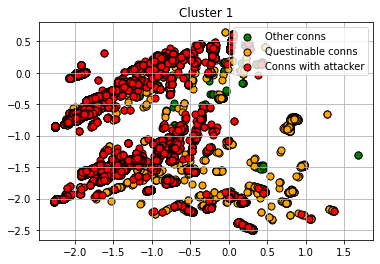

Total num of conns: 51323

Attacker conns ratio:
Yes    51101
No       222
Name: attacker_label, dtype: int64

Attack conns ratio:
Scan              18763
Scan,Snmp         10460
Not_Specified      9299
Scan,Pop3          5316
Pop3,Scan          4047
Web,Scan           1086
Web                 991
Pop3                321
Snmp,Scan           312
Scan,Pop3,Snmp      258
Normal              222
Snmp                104
Scan,Web             98
Scan,Snmp,Pop3       27
Pop3,Scan,Snmp        8
Snmp,Pop3,Scan        5
Snmp,Scan,Pop3        4
Virus                 2
Name: attack_label, dtype: int64

IPs:
4.122.55.221       16614
4.122.55.5          9565
200.110.252.58      7817
80.93.182.183       5553
111.66.58.19        4081
66.231.68.251       3141
27.3.0.196          1820
5.172.202.121        304
200.110.245.180      292
10.3.2.29            249
10.5.2.29            247
10.6.2.29            244
10.2.2.29            236
172.16.1.1           208
10.4.2.29            174
66.231.77.172        12

,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
387238,0.02044,4.122.55.221,0.03237,9.66.11.12,2019-03-20T08:11:29.238269Z,0.77278,0.00000,0.00000,tcp,none,S0,0.56107,36769,orig_reg_or_dyn,0.00000,0,44,0.04998,3268,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Pop3,Scan"
52824,0.91496,200.110.245.180,0.03237,9.66.33.12,2019-03-20T08:47:22.913295Z,0.79460,216.27197,0.00809,tcp,http,RSTO,0.91241,59794,orig_reg_or_dyn,0.00000,447,8253,0.00122,80,resp_80,0.00000,507,8003,0.00000,0.00000,1.00000,0.00000,0.00781,Yes,Scan
227446,0.50789,111.66.58.19,0.03237,9.66.22.12,2019-03-20T13:23:36.408211Z,0.96248,0.00000,0.00000,tcp,none,S0,0.53659,35165,orig_reg_or_dyn,0.00000,0,44,0.03982,2604,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
32505,0.91496,200.110.252.58,0.03237,9.66.44.12,2019-03-20T12:01:48.35738Z,0.91277,0.00000,0.00000,tcp,none,S0,0.65937,43211,orig_reg_or_dyn,0.00000,0,44,0.01814,1186,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Scan
165719,0.50789,111.66.58.19,0.03237,9.66.22.13,2019-03-20T13:23:36.118082Z,0.96248,0.00000,0.00000,tcp,none,S0,0.53659,35165,orig_reg_or_dyn,0.00000,0,44,0.76469,50002,resp_dyn,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
98774,0.50789,111.66.58.19,0.03237,9.66.22.12,2019-03-20T13:23:38.299061Z,0.96250,0.00000,0.00000,tcp,none,S0,0.53658,35164,orig_reg_or_dyn,0.00000,0,44,0.52873,34573,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
362853,0.30541,66.231.68.251,0.03237,9.66.33.13,2019-03-20T10:45:44.299277Z,0.86653,0.00000,0.00000,tcp,none,S0,0.53748,35223,orig_reg_or_dyn,0.00000,0,44,0.50134,32782,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Scan
107823,0.02044,4.122.55.5,0.03237,9.66.44.13,2019-03-20T13:48:31.027757Z,0.97762,0.00000,0.00000,tcp,none,S0,0.63919,41889,orig_reg_or_dyn,0.00000,0,44,0.00081,53,resp_53,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
359635,0.02044,4.122.55.221,0.03237,9.66.11.12,2019-03-20T08:11:37.249185Z,0.77286,0.00000,0.00000,tcp,none,S0,0.56107,36769,orig_reg_or_dyn,0.00000,0,44,0.00988,646,resp_well_known,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Pop3,Scan"
75278,0.02044,4.122.55.221,0.03237,9.66.11.12,2019-03-20T08:20:01.149146Z,0.77797,0.00000,0.00000,tcp,none,S0,0.75657,49581,orig_reg_or_dyn,0.00000,0,44,0.82652,54045,resp_dyn,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Pop3"


Cluster 1 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
42157,0.78545,172.16.1.1,0.03237,9.66.55.12,2019-03-20T11:36:26.010852Z,0.89735,1.91105,0.00007,tcp,http,SF,0.93023,60962,orig_reg_or_dyn,0.00000,687,1251,0.00122,80,resp_80,0.00002,5923,1532,0.00000,0.00000,1.00000,0.00000,0.00781,No,Normal
109987,0.78545,172.16.1.1,0.03237,9.66.55.12,2019-03-20T11:35:45.472868Z,0.89693,5.14106,0.00019,tcp,http,SF,0.92584,60674,orig_reg_or_dyn,0.00000,585,1769,0.00122,80,resp_80,0.00019,58464,60984,0.00000,0.00000,1.00000,0.00000,0.01562,No,Normal
164409,0.78545,172.16.1.1,0.03237,9.66.22.12,2019-03-20T10:49:51.674742Z,0.86904,0.00000,0.00000,tcp,none,S0,0.57933,37966,orig_reg_or_dyn,0.00000,0,60,0.00677,443,resp_443,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
45700,0.78545,172.16.1.1,0.03237,9.66.11.12,2019-03-20T10:01:15.69453Z,0.83950,0.00749,0.00000,tcp,http,SF,0.69387,45472,orig_reg_or_dyn,0.00000,620,888,0.00122,80,resp_80,0.00000,212,368,0.00000,0.00000,1.00000,0.00000,0.00000,No,Normal
234266,0.78545,172.16.1.1,0.03237,9.66.55.12,2019-03-20T11:33:34.315861Z,0.89561,64.99920,0.00243,tcp,http,SF,0.91241,59794,orig_reg_or_dyn,0.00000,535,855,0.00122,80,resp_80,0.00000,279,599,0.00000,0.00000,1.00000,0.00000,0.00781,No,Normal
401933,0.78545,172.16.1.1,0.03237,9.66.66.12,2019-03-20T12:25:24.623804Z,0.92711,0.02391,0.00000,tcp,http,S1,0.89843,58878,orig_reg_or_dyn,0.00000,943,1483,0.00122,80,resp_80,0.00009,28852,29484,0.00000,0.00000,1.00000,0.00000,0.01562,No,Normal
314885,0.78545,172.16.1.1,0.03237,9.66.55.12,2019-03-20T11:37:33.178618Z,0.89803,5.02767,0.00019,tcp,http,SF,0.50661,33200,orig_reg_or_dyn,0.00000,709,1029,0.00122,80,resp_80,0.00001,2521,2841,0.00000,0.00000,1.00000,0.00000,0.01562,No,Normal
19411,0.78545,172.16.1.1,0.03237,9.66.55.12,2019-03-20T10:58:59.023117Z,0.87458,5.01389,0.00019,tcp,http,SF,0.69686,45668,orig_reg_or_dyn,0.00000,527,795,0.00122,80,resp_80,0.00000,455,723,0.00000,0.00000,1.00000,0.00000,0.00781,No,Normal
394059,0.78545,172.16.1.1,0.03237,9.66.11.12,2019-03-20T08:26:20.621158Z,0.78181,5.61005,0.00021,tcp,http,SF,0.88244,57830,orig_reg_or_dyn,0.00000,2797,7533,0.00122,80,resp_80,0.00095,296218,297032,0.00000,0.00000,1.00000,0.00000,0.03906,No,Normal
159268,0.78545,172.16.1.1,0.03237,9.66.55.12,2019-03-20T11:35:45.051108Z,0.89693,0.40085,0.00002,tcp,http,SF,0.92569,60664,orig_reg_or_dyn,0.00000,518,2338,0.00122,80,resp_80,0.00046,143126,144850,0.00000,0.00000,1.00000,0.00000,0.00781,No,Normal


Protocol:
tcp     48439
icmp     1720
udp      1164
Name: protocol, dtype: int64

Service:
none    41543
ssl      5980
http     2627
dns      1154
ntp        13
smtp        6
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    49589
orig_well_known     1734
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_reg           24466
resp_well_known    18495
resp_80             3284
resp_53             2328
resp_dyn            1694
resp_443             907
resp_22               63
resp_21               37
resp_3389             36
resp_123              13
Name: resp_p_cat, dtype: int64




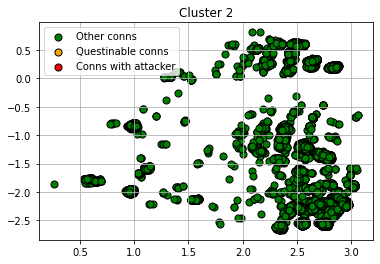

Total num of conns: 41274

Attacker conns ratio:
No    41274
Name: attacker_label, dtype: int64

Attack conns ratio:
Normal    41274
Name: attack_label, dtype: int64

IPs:
9.66.22.13      7762
9.66.44.13      4634
9.66.55.13      4338
9.66.33.13      3460
9.66.11.13      2884
                ... 
4.122.55.20        3
4.122.55.254       1
10.5.5.2           1
10.0.3.33          1
10.0.3.32          1
Name: originated_ip, Length: 90, dtype: int64

4.122.55.3        33267
8.8.8.8            4525
147.251.4.33       2534
9.66.22.13          782
224.0.0.252          95
147.251.6.10         36
224.0.0.251          12
4.122.55.255          9
198.41.0.4            8
142.44.139.233        2
185.210.219.98        1
192.5.6.30            1
10.7.100.254          1
4.122.55.254          1
Name: responded_ip, dtype: int64

Cluster 2 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
65497,0.04227,9.66.66.13,0.01362,4.122.55.3,2019-03-19T14:58:57.338106Z,0.18170,0.00552,0.00000,udp,dns,SF,0.41583,27251,orig_reg_or_dyn,0.00000,64,92,0.00081,53,resp_53,0.00000,391,419,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
168645,0.04227,9.66.66.13,0.01362,4.122.55.3,2019-03-19T13:23:58.264585Z,0.12397,0.00484,0.00000,udp,dns,SF,0.82661,54171,orig_reg_or_dyn,0.00000,28,56,0.00081,53,resp_53,0.00000,342,370,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
235274,0.04226,9.66.22.13,0.01362,4.122.55.3,2019-03-19T13:31:33.37822Z,0.12858,0.03230,0.00000,udp,dns,SF,0.53812,35265,orig_reg_or_dyn,0.00000,49,77,0.00081,53,resp_53,0.00000,443,471,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
459784,0.04226,9.66.55.13,0.01362,4.122.55.3,2019-03-19T14:11:43.744296Z,0.15300,0.00525,0.00000,udp,dns,SF,0.07859,5150,orig_reg_or_dyn,0.00000,66,94,0.00081,53,resp_53,0.00000,393,421,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
209713,0.04226,9.66.22.13,0.01362,4.122.55.3,2019-03-19T14:28:27.398583Z,0.16316,0.00422,0.00000,udp,dns,SF,0.14257,9343,orig_reg_or_dyn,0.00000,52,80,0.00081,53,resp_53,0.00000,427,455,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
75427,0.04574,10.5.4.45,0.01362,4.122.55.3,2019-03-19T15:07:22.252468Z,0.18681,0.00581,0.00000,udp,dns,SF,0.83891,54977,orig_reg_or_dyn,0.00000,28,56,0.00081,53,resp_53,0.00000,77,105,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
51551,0.04226,9.66.33.13,0.01362,4.122.55.3,2019-03-19T12:50:13.819243Z,0.10346,0.00415,0.00000,udp,dns,SF,0.15876,10404,orig_reg_or_dyn,0.00000,66,94,0.00081,53,resp_53,0.00000,393,421,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
279241,0.04226,9.66.22.13,0.01362,4.122.55.3,2019-03-19T14:33:03.923107Z,0.16596,0.02998,0.00000,udp,dns,SF,0.94911,62199,orig_reg_or_dyn,0.00000,56,84,0.00081,53,resp_53,0.00000,431,459,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
7086,0.04226,9.66.44.13,0.01362,4.122.55.3,2019-03-19T12:08:05.577418Z,0.07785,0.02638,0.00000,udp,dns,SF,0.96323,63124,orig_reg_or_dyn,0.00000,47,75,0.00081,53,resp_53,0.00000,108,136,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
215549,0.04574,10.5.4.47,0.02756,8.8.8.8,2019-03-19T13:39:15.457521Z,0.13326,0.05326,0.00000,udp,dns,SF,0.90698,59438,orig_reg_or_dyn,0.00000,44,72,0.00081,53,resp_53,0.00000,163,191,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal


Protocol:
udp     39193
icmp     1956
tcp       125
Name: protocol, dtype: int64

Service:
dns     39197
none     2077
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    39307
orig_well_known     1967
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            39197
resp_well_known     1967
resp_reg             107
resp_3389              3
Name: resp_p_cat, dtype: int64




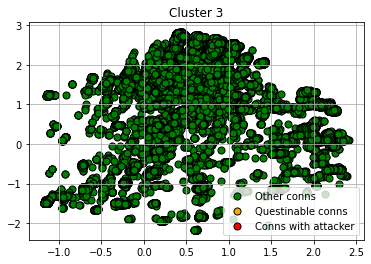

Total num of conns: 88942

Attacker conns ratio:
No    88942
Name: attacker_label, dtype: int64

Attack conns ratio:
Normal    88942
Name: attack_label, dtype: int64

IPs:
4.122.55.5        8528
10.2.4.49         3198
10.4.2.29         2352
10.1.2.29         2320
10.6.2.29         2219
                  ... 
195.113.157.70       1
172.217.23.206       1
129.70.132.32        1
9.66.3.1             1
212.96.119.83        1
Name: originated_ip, Length: 210, dtype: int64

4.122.55.2         28137
217.30.75.147       2602
147.231.100.5       2442
4.122.55.7          1878
4.122.55.5          1858
                   ...  
40.97.124.34           1
213.155.156.168        1
5.62.48.17             1
52.88.150.81           1
52.0.71.117            1
Name: responded_ip, Length: 1474, dtype: int64

Cluster 3 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
230609,0.04567,10.1.2.29,0.01362,4.122.55.7,2019-03-19T10:23:57.096244Z,0.01456,0.00421,0.00000,icmp,none,OTH,0.00012,8,orig_well_known,0.00000,56,84,0.00000,0,resp_well_known,0.00000,56,84,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
293699,0.04574,10.5.2.25,0.76289,195.137.195.253,2019-03-19T14:52:21.491992Z,0.17769,0.03202,0.00000,udp,ntp,SF,0.00188,123,orig_well_known,0.00000,48,76,0.00188,123,resp_123,0.00000,48,76,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
362534,0.04567,10.1.4.46,0.03132,8.253.204.121,2019-03-19T10:59:33.618256Z,0.03620,0.30259,0.00001,tcp,http,S3,0.76873,50378,orig_reg_or_dyn,0.00000,427,598,0.00122,80,resp_80,0.00000,1011,1183,0.00000,0.00000,1.00000,0.00000,0.00781,No,Normal
218526,0.02044,4.122.55.4,0.03534,10.4.2.29,2019-03-19T13:07:21.070988Z,0.11387,0.00000,0.00000,icmp,none,OTH,0.00000,0,orig_well_known,0.00000,0,84,0.00012,8,resp_well_known,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
412481,0.04572,10.4.2.29,0.01362,4.122.55.6,2019-03-19T12:07:51.03754Z,0.07770,0.00417,0.00000,icmp,none,OTH,0.00012,8,orig_well_known,0.00000,56,84,0.00000,0,resp_well_known,0.00000,56,84,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
442473,0.04574,10.5.5.2,0.01362,4.122.55.115,2019-03-19T16:02:35.601155Z,0.22038,12.93937,0.00048,tcp,ssl,SF,0.67342,44132,orig_reg_or_dyn,0.00000,881,1397,0.06795,4443,resp_reg,0.00000,1548,2024,0.00000,0.00000,0.00000,1.00000,0.00781,No,Normal
49755,0.04570,10.3.4.44,0.36660,94.124.107.190,2019-03-19T13:58:48.891086Z,0.14515,0.01104,0.00000,udp,ntp,SF,0.00188,123,orig_well_known,0.00000,48,76,0.00188,123,resp_123,0.00000,48,76,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
123597,0.04570,10.3.4.44,0.01362,4.122.55.2,2019-03-19T15:32:32.103992Z,0.20211,0.52524,0.00002,tcp,ssl,SF,0.72903,47776,orig_reg_or_dyn,0.00000,603,1495,0.00677,443,resp_443,0.00010,32091,24280,0.00000,0.00000,0.00000,1.00000,0.00781,No,Normal
123211,0.04574,10.5.2.22,0.67391,172.217.23.238,2019-03-19T15:29:36.470244Z,0.20033,15.06399,0.00056,udp,none,SF,0.79273,51951,orig_reg_or_dyn,0.00000,3214,3410,0.00677,443,resp_443,0.00001,2029,2197,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
461083,0.04567,10.1.2.22,0.04832,13.83.148.218,2019-03-19T11:49:11.174467Z,0.06636,2.70961,0.00010,tcp,ssl,SF,0.78985,51762,orig_reg_or_dyn,0.00001,19411,20475,0.00677,443,resp_443,0.00003,8169,9141,0.00000,0.00000,0.00000,1.00000,0.01562,No,Normal


Protocol:
tcp     60812
udp     16159
icmp    11971
Name: protocol, dtype: int64

Service:
ssl     35993
none    23921
http    14281
ntp     13888
dns       685
dhcp      161
ssh        13
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    62941
orig_well_known    26001
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           38647
resp_well_known    16857
resp_80            15762
resp_123           13888
resp_reg            2244
resp_53             1472
resp_22               53
resp_dyn              15
resp_3389              4
Name: resp_p_cat, dtype: int64




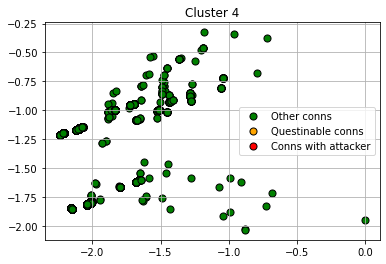

Total num of conns: 11993

Attacker conns ratio:
No    11993
Name: attacker_label, dtype: int64

Attack conns ratio:
Normal    11993
Name: attack_label, dtype: int64

IPs:
212.96.119.83    11988
4.122.55.5           5
Name: originated_ip, dtype: int64

9.66.22.14    6136
9.66.22.13    5857
Name: responded_ip, dtype: int64

Cluster 4 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
213365,0.96948,212.96.119.83,0.03237,9.66.22.14,2019-03-19T10:05:07.792094Z,0.00312,0.00000,0.00000,tcp,none,S0,0.50702,33227,orig_reg_or_dyn,0.00000,0,44,0.04999,3269,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
140236,0.96948,212.96.119.83,0.03237,9.66.22.13,2019-03-19T10:22:38.173137Z,0.01376,0.00000,0.00000,tcp,none,S0,0.70458,46174,orig_reg_or_dyn,0.00000,0,44,0.09705,6346,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
308963,0.96948,212.96.119.83,0.03237,9.66.22.13,2019-03-19T10:24:23.247656Z,0.01482,0.00000,0.00000,tcp,none,S0,0.90327,59195,orig_reg_or_dyn,0.00000,0,44,0.10381,6788,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
431456,0.96948,212.96.119.83,0.03237,9.66.22.14,2019-03-19T10:22:36.241814Z,0.01374,0.00000,0.00000,tcp,none,S0,0.70458,46174,orig_reg_or_dyn,0.00000,0,44,0.05934,3880,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
433998,0.96948,212.96.119.83,0.03237,9.66.22.14,2019-03-19T10:22:38.178219Z,0.01376,0.00000,0.00000,tcp,none,S0,0.70458,46174,orig_reg_or_dyn,0.00000,0,44,0.14671,9593,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
211795,0.96948,212.96.119.83,0.03237,9.66.22.14,2019-03-19T10:24:17.883427Z,0.01477,0.00000,0.00000,tcp,none,S0,0.90326,59194,orig_reg_or_dyn,0.00000,0,44,0.09338,6106,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
365757,0.96948,212.96.119.83,0.03237,9.66.22.14,2019-03-19T10:05:08.290381Z,0.00312,0.00000,0.00000,tcp,none,S0,0.50702,33227,orig_reg_or_dyn,0.00000,0,44,0.00520,340,resp_well_known,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
329088,0.96948,212.96.119.83,0.03237,9.66.22.14,2019-03-19T10:24:21.142804Z,0.01480,0.00000,0.00000,tcp,none,S0,0.90326,59194,orig_reg_or_dyn,0.00000,0,44,0.01925,1259,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
79332,0.96948,212.96.119.83,0.03237,9.66.22.13,2019-03-19T10:24:18.683727Z,0.01478,0.00000,0.00000,tcp,none,S0,0.90327,59195,orig_reg_or_dyn,0.00000,0,44,0.03979,2602,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
97676,0.96948,212.96.119.83,0.03237,9.66.22.14,2019-03-19T10:22:35.643616Z,0.01373,0.00000,0.00000,tcp,none,S0,0.70457,46173,orig_reg_or_dyn,0.00000,0,44,0.68056,44501,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Normal


Protocol:
tcp     11991
icmp        1
udp         1
Name: protocol, dtype: int64

Service:
none       11861
http          70
ssl           21
krb_tcp       18
dce_rpc       16
dns            7
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    11992
orig_well_known        1
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_reg           9299
resp_well_known    1735
resp_dyn            843
resp_443             29
resp_80              25
resp_53              20
resp_3389            18
resp_22              12
resp_21              12
Name: resp_p_cat, dtype: int64




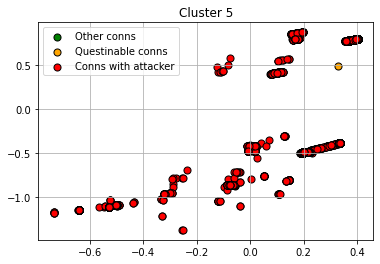

Total num of conns: 9457

Attacker conns ratio:
Yes    9457
Name: attacker_label, dtype: int64

Attack conns ratio:
Scan             7363
Scan,Snmp        1950
Scan,Web          130
Web,Scan           12
Not_Specified       2
Name: attack_label, dtype: int64

IPs:
5.23.147.206    9446
4.122.55.5        11
Name: originated_ip, dtype: int64

9.66.33.12    9457
Name: responded_ip, dtype: int64

Cluster 5 NOK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
84793,0.02325,5.23.147.206,0.03237,9.66.33.12,2019-03-20T08:20:30.098346Z,0.77826,3.94982,0.00015,tcp,ssl,SF,0.71511,46864,orig_reg_or_dyn,0.00000,206,526,0.00677,443,resp_443,0.00001,2448,2664,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
139994,0.02325,5.23.147.206,0.03237,9.66.33.12,2019-03-20T08:18:58.200383Z,0.77733,3.09699,0.00012,tcp,ssl,SF,0.63527,41632,orig_reg_or_dyn,0.00000,206,526,0.00677,443,resp_443,0.00001,2448,2664,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
323536,0.02325,5.23.147.206,0.03237,9.66.33.12,2019-03-20T08:21:44.665641Z,0.77902,4.28807,0.00016,tcp,ssl,SF,0.77703,50922,orig_reg_or_dyn,0.00000,206,526,0.00677,443,resp_443,0.00001,2448,2716,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
265896,0.02325,5.23.147.206,0.03237,9.66.33.12,2019-03-20T08:18:51.882053Z,0.77727,4.54451,0.00017,tcp,ssl,SF,0.62960,41260,orig_reg_or_dyn,0.00000,206,526,0.00677,443,resp_443,0.00001,2448,2664,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
160846,0.02325,5.23.147.206,0.03237,9.66.33.12,2019-03-20T08:19:59.096873Z,0.77795,0.33018,0.00001,tcp,ssl,SF,0.68673,45004,orig_reg_or_dyn,0.00000,206,526,0.00677,443,resp_443,0.00001,2448,2664,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
311599,0.02325,5.23.147.206,0.03237,9.66.33.12,2019-03-20T08:21:46.084397Z,0.77903,2.86496,0.00011,tcp,ssl,SF,0.77816,50996,orig_reg_or_dyn,0.00000,206,526,0.00677,443,resp_443,0.00001,2448,2664,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
269398,0.02325,5.23.147.206,0.03237,9.66.33.12,2019-03-20T08:18:24.737719Z,0.77699,1.53697,0.00006,tcp,ssl,SF,0.60546,39678,orig_reg_or_dyn,0.00000,206,526,0.00677,443,resp_443,0.00001,2448,2664,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
196232,0.02325,5.23.147.206,0.03237,9.66.33.12,2019-03-20T08:21:43.511538Z,0.77901,5.45008,0.00020,tcp,ssl,SF,0.77615,50864,orig_reg_or_dyn,0.00000,206,526,0.00677,443,resp_443,0.00001,2448,2664,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
456296,0.02325,5.23.147.206,0.03237,9.66.33.12,2019-03-20T08:21:36.527744Z,0.77894,1.49545,0.00006,tcp,ssl,SF,0.77071,50508,orig_reg_or_dyn,0.00000,206,526,0.00677,443,resp_443,0.00001,2448,2716,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
56778,0.02325,5.23.147.206,0.03237,9.66.33.12,2019-03-20T08:18:34.356845Z,0.77709,1.37702,0.00005,tcp,ssl,SF,0.61440,40264,orig_reg_or_dyn,0.00000,206,526,0.00677,443,resp_443,0.00001,2448,2664,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan


Protocol:
tcp     9453
icmp       2
udp        2
Name: protocol, dtype: int64

Service:
ssl         7169
none        2240
http          33
smtp           5
ssl,imap       5
imap           4
pop3           1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    9455
orig_well_known       2
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           7408
resp_reg           1545
resp_well_known     342
resp_dyn            107
resp_80              47
resp_21               2
resp_22               2
resp_3389             2
resp_53               2
Name: resp_p_cat, dtype: int64




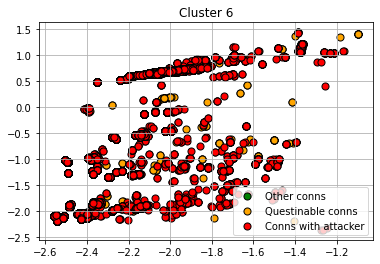

Total num of conns: 77087

Attacker conns ratio:
Yes    77087
Name: attacker_label, dtype: int64

Attack conns ratio:
Scan,Snmp         68239
Scan               6335
Scan,Pop3,Snmp      984
Snmp,Scan           633
Not_Specified       441
Scan,Snmp,Pop3      208
Scan,Pop3            68
Pop3,Scan            52
Snmp,Scan,Pop3       39
Pop3                 32
Scan,Else            21
Else                 21
Else,Scan            14
Name: attack_label, dtype: int64

IPs:
111.66.58.19       14929
212.96.119.83      14011
181.118.158.126    12159
5.23.147.206       11884
4.122.55.226       11840
80.93.182.183       8013
4.122.55.221        4240
200.110.252.58        11
Name: originated_ip, dtype: int64

9.66.22.14     13419
9.66.22.13     11741
9.66.22.12      9968
9.66.55.14      4060
9.66.33.12      3982
9.66.2.13       3980
9.66.33.14      3971
9.66.55.12      3953
9.66.33.13      3931
9.66.44.12      3919
9.66.44.13      3899
9.66.11.12      2194
9.66.11.14      2047
9.66.44.14      2033
9.

,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
404537,0.96948,212.96.119.83,0.03237,9.66.22.14,2019-03-20T08:01:23.757054Z,0.76665,0.00000,0.00000,tcp,none,S0,0.69141,45311,orig_reg_or_dyn,0.00000,0,44,0.00274,179,resp_well_known,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
205672,0.50789,111.66.58.19,0.03237,9.66.22.14,2019-03-20T12:40:09.293847Z,0.93607,0.00000,0.00000,tcp,none,S0,0.51563,33791,orig_reg_or_dyn,0.00000,0,44,0.04593,3003,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
60607,0.02325,5.23.147.206,0.03237,9.66.33.13,2019-03-20T08:01:37.08584Z,0.76679,0.00000,0.00000,tcp,none,S0,0.85838,56253,orig_reg_or_dyn,0.00000,0,44,0.01379,902,resp_well_known,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
63179,0.02044,4.122.55.226,0.03237,9.66.44.12,2019-03-20T08:02:58.632933Z,0.76761,0.00000,0.00000,tcp,none,S0,0.87396,57274,orig_reg_or_dyn,0.00000,0,44,0.03068,2006,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
26177,0.82836,181.118.158.126,0.03237,9.66.22.12,2019-03-20T08:42:09.03559Z,0.79142,0.00000,0.00000,tcp,none,S0,0.81318,53291,orig_reg_or_dyn,0.00000,0,44,0.10734,7019,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
334878,0.96948,212.96.119.83,0.03237,9.66.2.14,2019-03-20T08:09:52.980156Z,0.77181,0.14546,0.00001,tcp,none,S0,0.98495,64548,orig_reg_or_dyn,0.00000,0,2024,0.03158,2065,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
430241,0.02044,4.122.55.226,0.03237,9.66.44.14,2019-03-20T08:03:03.340084Z,0.76766,0.00000,0.00000,tcp,none,S0,0.87394,57273,orig_reg_or_dyn,0.00000,0,44,0.01616,1057,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
82652,0.02044,4.122.55.226,0.03237,9.66.44.13,2019-03-20T08:01:30.526694Z,0.76672,0.00000,0.00000,tcp,none,S0,0.77476,50773,orig_reg_or_dyn,0.00000,0,44,0.12511,8181,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
222740,0.50789,111.66.58.19,0.03237,9.66.22.14,2019-03-20T12:42:48.185544Z,0.93768,0.00000,0.00000,tcp,none,S0,0.55707,36507,orig_reg_or_dyn,0.00000,0,44,0.08503,5560,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"
341768,0.50789,111.66.58.19,0.03237,9.66.22.12,2019-03-20T12:42:49.284262Z,0.93769,0.00000,0.00000,tcp,none,S0,0.55708,36508,orig_reg_or_dyn,0.00000,0,44,0.01607,1051,resp_reg,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,"Scan,Snmp"


Protocol:
tcp     77085
icmp        2
Name: protocol, dtype: int64

Service:
none       76439
http         360
ssl          228
krb_tcp       24
dce_rpc       22
imap           7
dns            4
smtp           3
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    77084
orig_well_known        3
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_reg           59676
resp_well_known    11458
resp_dyn            4444
resp_80              863
resp_443             291
resp_22              100
resp_3389             92
resp_21               84
resp_53               79
Name: resp_p_cat, dtype: int64




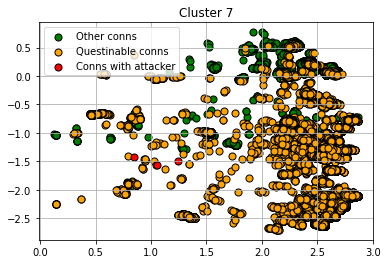

Total num of conns: 52301

Attacker conns ratio:
Yes    33870
No     18431
Name: attacker_label, dtype: int64

Attack conns ratio:
Not_Specified    33867
Normal           18431
Web                  3
Name: attack_label, dtype: int64

IPs:
9.66.55.13       13342
9.66.22.13        5694
10.4.4.46         4593
9.66.44.13        3078
4.122.55.3        2637
                 ...  
4.122.55.112         2
10.1.3.34            2
4.122.55.29          2
10.4.3.32            1
80.93.176.151        1
Name: originated_ip, Length: 104, dtype: int64

4.122.55.3        31063
8.8.8.8            7741
147.251.4.33       3471
9.66.44.13         1330
9.66.22.13         1276
                  ...  
91.199.212.50         1
8.254.13.1            1
45.54.46.1            1
203.130.50.2          1
205.251.199.48        1
Name: responded_ip, Length: 409, dtype: int64

Cluster 7 NOK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
22224,0.04567,10.1.4.48,0.01362,4.122.55.3,2019-03-20T10:21:22.081495Z,0.85172,0.00414,0.00000,udp,dns,SF,0.64518,42281,orig_reg_or_dyn,0.00000,28,56,0.00081,53,resp_53,0.00000,77,105,1.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
161713,0.04226,9.66.55.13,0.01362,4.122.55.3,2019-03-20T13:26:45.094924Z,0.96439,0.02703,0.00000,udp,dns,SF,0.45938,30105,orig_reg_or_dyn,0.00000,57,85,0.00081,53,resp_53,0.00000,181,209,1.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
369495,0.04570,10.3.4.48,0.01362,4.122.55.3,2019-03-20T07:29:42.12682Z,0.74739,0.00136,0.00000,udp,dns,SF,0.67643,44329,orig_reg_or_dyn,0.00000,28,56,0.00081,53,resp_53,0.00000,77,105,1.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
239864,0.04227,9.66.66.13,0.01362,4.122.55.3,2019-03-20T12:04:57.139584Z,0.91468,0.00291,0.00000,udp,dns,SF,0.74300,48692,orig_reg_or_dyn,0.00000,39,67,0.00081,53,resp_53,0.00000,84,112,1.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
385851,0.04226,9.66.44.13,0.01362,4.122.55.3,2019-03-20T11:03:10.553497Z,0.87713,0.00396,0.00000,udp,dns,SF,0.97809,64098,orig_reg_or_dyn,0.00000,28,56,0.00081,53,resp_53,0.00000,342,370,1.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
438701,0.04570,10.3.2.26,0.01362,4.122.55.3,2019-03-20T10:26:42.360129Z,0.85497,0.00284,0.00000,udp,dns,SF,0.50331,32984,orig_reg_or_dyn,0.00000,28,56,0.00081,53,resp_53,0.00000,77,105,1.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
200824,0.04226,9.66.55.13,0.01362,4.122.55.3,2019-03-20T08:03:02.653342Z,0.76765,0.00473,0.00000,udp,dns,SF,0.36940,24208,orig_reg_or_dyn,0.00000,28,56,0.00081,53,resp_53,0.00000,342,370,1.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
87761,0.04226,9.66.55.13,0.01362,4.122.55.3,2019-03-20T08:13:34.706048Z,0.77405,0.37128,0.00001,udp,dns,SF,0.65569,42970,orig_reg_or_dyn,0.00000,45,73,0.00081,53,resp_53,0.00000,45,73,1.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
64257,0.04226,9.66.33.13,0.01362,4.122.55.3,2019-03-20T11:18:16.310997Z,0.88631,0.00629,0.00000,udp,dns,SF,0.45648,29915,orig_reg_or_dyn,0.00000,76,104,0.00081,53,resp_53,0.00000,467,495,1.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified
86383,0.04226,9.66.22.13,0.01362,4.122.55.3,2019-03-20T12:06:53.986328Z,0.91586,0.00384,0.00000,udp,dns,SF,0.57828,37897,orig_reg_or_dyn,0.00000,40,68,0.00081,53,resp_53,0.00000,402,430,1.00000,0.00000,0.00000,0.00000,0.00000,Yes,Not_Specified


Cluster 7 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
96184,0.04567,10.1.4.47,0.57639,147.251.4.33,2019-03-20T12:59:11.980005Z,0.94765,0.00494,0.00000,udp,dns,SF,0.81405,53348,orig_reg_or_dyn,0.00000,49,77,0.00081,53,resp_53,0.00000,491,519,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
216612,0.04572,10.4.4.46,0.02756,8.8.8.8,2019-03-20T12:11:55.870074Z,0.91892,0.04266,0.00000,udp,dns,SF,0.81178,53199,orig_reg_or_dyn,0.00000,32,60,0.00081,53,resp_53,0.00000,132,160,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
124409,0.04572,10.4.4.46,0.02756,8.8.8.8,2019-03-20T09:32:37.799727Z,0.82210,0.04042,0.00000,udp,dns,SF,0.84117,55125,orig_reg_or_dyn,0.00000,47,75,0.00081,53,resp_53,0.00000,92,120,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
77583,0.04572,10.4.2.29,0.02756,8.8.8.8,2019-03-20T13:59:09.738239Z,0.98409,0.02830,0.00000,udp,dns,SF,0.63865,41853,orig_reg_or_dyn,0.00000,78,134,0.00081,53,resp_53,0.00000,197,253,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
113579,0.04226,9.66.55.13,0.11812,31.31.196.34,2019-03-20T08:12:16.127618Z,0.77326,0.04152,0.00000,udp,dns,SF,0.41893,27454,orig_reg_or_dyn,0.00000,45,73,0.00081,53,resp_53,0.00000,45,73,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
158824,0.04572,10.4.4.46,0.02756,8.8.8.8,2019-03-20T08:10:25.244204Z,0.77214,0.02596,0.00000,udp,dns,SF,0.97732,64048,orig_reg_or_dyn,0.00000,40,68,0.00081,53,resp_53,0.00000,56,84,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
52590,0.04226,9.66.55.13,0.11812,31.31.194.2,2019-03-20T08:13:47.32881Z,0.77418,0.03850,0.00000,udp,dns,SF,0.95186,62379,orig_reg_or_dyn,0.00000,45,73,0.00081,53,resp_53,0.00000,45,73,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
124785,0.04572,10.4.2.22,0.74985,192.54.112.30,2019-03-20T10:49:14.892485Z,0.86867,0.02142,0.00000,udp,dns,SF,0.92843,60844,orig_reg_or_dyn,0.00000,51,79,0.00081,53,resp_53,0.00000,622,650,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
5784,0.04572,10.4.4.46,0.02756,8.8.8.8,2019-03-20T10:47:09.984857Z,0.86740,0.02335,0.00000,udp,dns,SF,0.84747,55538,orig_reg_or_dyn,0.00000,60,88,0.00081,53,resp_53,0.00000,138,166,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal
143701,0.04572,10.4.4.46,0.02756,8.8.8.8,2019-03-20T08:47:36.919096Z,0.79474,0.03719,0.00000,udp,dns,SF,0.99799,65402,orig_reg_or_dyn,0.00000,36,64,0.00081,53,resp_53,0.00000,68,96,1.00000,0.00000,0.00000,0.00000,0.00000,No,Normal


Protocol:
udp     51986
icmp      310
tcp         5
Name: protocol, dtype: int64

Service:
dns     51986
none      310
ntp         5
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    51983
orig_well_known      318
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            51825
resp_well_known      318
resp_reg             153
resp_123               5
Name: resp_p_cat, dtype: int64




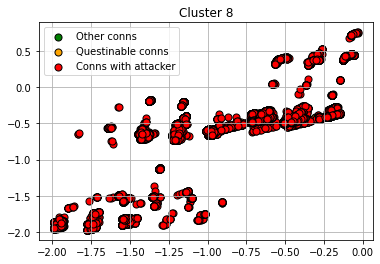

Total num of conns: 19886

Attacker conns ratio:
Yes    19886
Name: attacker_label, dtype: int64

Attack conns ratio:
Scan             16866
Scan,Pop3         2151
Pop3,Scan          605
Scan,Snmp          170
Not_Specified       92
Pop3                 2
Name: attack_label, dtype: int64

IPs:
80.93.182.183    11223
4.122.55.114      8663
Name: originated_ip, dtype: int64

9.66.55.12    6312
9.66.55.13    4911
9.66.44.12    4656
9.66.44.13    4007
Name: responded_ip, dtype: int64

Cluster 8 NOK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
293278,0.36686,80.93.182.183,0.03237,9.66.55.13,2019-03-20T08:11:18.615095Z,0.77268,0.05416,0.00000,tcp,none,SF,0.55733,36524,orig_reg_or_dyn,0.00000,22,290,0.00034,22,resp_22,0.00000,0,152,0.00000,1.00000,0.00000,0.00000,0.00000,Yes,Scan
198232,0.36686,80.93.182.183,0.03237,9.66.55.12,2019-03-20T08:14:42.126905Z,0.77474,0.02319,0.00000,tcp,none,RSTR,0.82284,53924,orig_reg_or_dyn,0.00000,22,186,0.00034,22,resp_22,0.00000,0,164,0.00000,1.00000,0.00000,0.00000,0.00000,Yes,Scan
24806,0.02044,4.122.55.114,0.03237,9.66.44.13,2019-03-20T08:10:27.286687Z,0.77216,0.00986,0.00000,tcp,none,RSTR,0.55104,36112,orig_reg_or_dyn,0.00000,22,186,0.00034,22,resp_22,0.00000,0,164,0.00000,1.00000,0.00000,0.00000,0.00000,Yes,Scan
317575,0.02044,4.122.55.114,0.03237,9.66.44.12,2019-03-20T08:11:01.898476Z,0.77251,0.01306,0.00000,tcp,none,SF,0.60613,39722,orig_reg_or_dyn,0.00000,22,238,0.00034,22,resp_22,0.00000,0,152,0.00000,1.00000,0.00000,0.00000,0.00000,Yes,Scan
336843,0.36686,80.93.182.183,0.03237,9.66.55.13,2019-03-20T08:04:23.117675Z,0.76847,0.02296,0.00000,tcp,none,SF,0.79580,52152,orig_reg_or_dyn,0.00000,22,238,0.00034,22,resp_22,0.00000,0,152,0.00000,1.00000,0.00000,0.00000,0.00000,Yes,Scan
395535,0.02044,4.122.55.114,0.03237,9.66.44.13,2019-03-20T08:05:53.884283Z,0.76939,0.00898,0.00000,tcp,none,RSTR,0.85293,55896,orig_reg_or_dyn,0.00000,22,186,0.00034,22,resp_22,0.00000,0,164,0.00000,1.00000,0.00000,0.00000,0.00000,Yes,Scan
209044,0.36686,80.93.182.183,0.03237,9.66.55.13,2019-03-20T08:10:36.729068Z,0.77225,20.00184,0.00075,tcp,ssh,SF,0.54073,35436,orig_reg_or_dyn,0.00000,1494,2386,0.00034,22,resp_22,0.00001,2149,3273,0.00000,1.00000,0.00000,0.00000,0.00000,Yes,Scan
168279,0.36686,80.93.182.183,0.03237,9.66.55.13,2019-03-20T08:09:10.942102Z,0.77138,0.02963,0.00000,tcp,none,RSTR,0.50175,32882,orig_reg_or_dyn,0.00000,22,186,0.00034,22,resp_22,0.00000,0,164,0.00000,1.00000,0.00000,0.00000,0.00000,Yes,Scan
393752,0.36686,80.93.182.183,0.03237,9.66.55.12,2019-03-20T08:04:19.995784Z,0.76844,13.39671,0.00050,tcp,ssh,SF,0.53850,35290,orig_reg_or_dyn,0.00000,1494,2326,0.00034,22,resp_22,0.00001,2149,3457,0.00000,1.00000,0.00000,0.00000,0.00000,Yes,"Scan,Pop3"
253200,0.36686,80.93.182.183,0.03237,9.66.55.13,2019-03-20T08:15:07.049852Z,0.77499,0.03823,0.00000,tcp,none,SF,0.66115,43328,orig_reg_or_dyn,0.00000,22,238,0.00034,22,resp_22,0.00000,0,152,0.00000,1.00000,0.00000,0.00000,0.00000,Yes,Scan


Protocol:
tcp    19886
Name: protocol, dtype: int64

Service:
none    11979
ssh      7323
ssl       584
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    19886
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_22            19294
resp_well_known      592
Name: resp_p_cat, dtype: int64




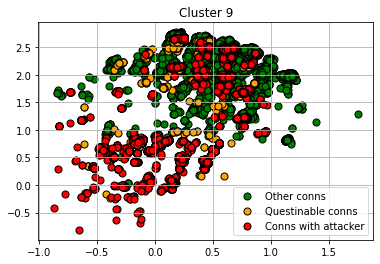

Total num of conns: 41711

Attacker conns ratio:
No     20884
Yes    20827
Name: attacker_label, dtype: int64

Attack conns ratio:
Normal           20884
Not_Specified     7842
Scan              6310
Web               3772
Scan,Pop3         1349
Pop3,Scan         1319
Pop3               189
Scan,Web            26
Web,Scan            20
Name: attack_label, dtype: int64

IPs:
10.5.5.2        7148
10.4.4.46       3360
10.5.4.42       2887
4.122.55.221    2624
10.2.4.42       1796
                ... 
10.1.3.34          1
9.66.4.2           1
9.66.55.13         1
9.66.44.13         1
9.66.44.12         1
Name: originated_ip, Length: 104, dtype: int64

4.122.55.2        10232
4.122.55.115       7139
9.66.11.12         2645
40.112.75.175      1260
52.136.230.174      757
                  ...  
51.75.146.161         1
104.17.67.176         1
54.149.111.157        1
52.85.246.21          1
104.17.103.89         1
Name: responded_ip, Length: 1300, dtype: int64

Cluster 9 NOK sample connections

,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
294636,0.04567,10.1.4.44,0.01362,4.122.55.2,2019-03-20T13:42:22.149674Z,0.97389,0.52945,0.00002,tcp,ssl,SF,0.54286,35576,orig_reg_or_dyn,0.00000,600,2084,0.00677,443,resp_443,0.00032,100774,92924,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Web
69810,0.04574,10.5.4.44,0.01362,4.122.55.2,2019-03-20T07:02:48.166207Z,0.73104,0.46528,0.00002,tcp,ssl,SF,0.59392,38922,orig_reg_or_dyn,0.00000,603,2299,0.00677,443,resp_443,0.00010,32091,37243,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Web
273287,0.04574,10.5.4.45,0.01362,4.122.55.2,2019-03-20T08:19:22.14233Z,0.77757,0.58923,0.00002,tcp,ssl,SF,0.70727,46350,orig_reg_or_dyn,0.00000,600,3796,0.00677,443,resp_443,0.00032,100774,106654,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Not_Specified
361658,0.04576,10.6.4.44,0.01362,4.122.55.2,2019-03-20T07:52:57.235754Z,0.76152,0.55444,0.00002,tcp,ssl,SF,0.88040,57696,orig_reg_or_dyn,0.00000,600,3240,0.00677,443,resp_443,0.00032,100774,104923,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Web
346119,0.04572,10.4.4.43,0.01362,4.122.55.2,2019-03-20T10:55:18.938796Z,0.87235,0.29358,0.00001,tcp,ssl,RSTO,0.92164,60399,orig_reg_or_dyn,0.00000,381,3909,0.00677,443,resp_443,0.00033,100958,113650,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Not_Specified
120876,0.04574,10.5.5.2,0.01362,4.122.55.115,2019-03-20T13:23:17.057155Z,0.96229,4.93266,0.00018,tcp,ssl,SF,0.58318,38218,orig_reg_or_dyn,0.00000,817,1449,0.06795,4443,resp_reg,0.00000,1548,3099,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Not_Specified
308923,0.04574,10.5.5.2,0.01362,4.122.55.115,2019-03-20T13:29:15.933155Z,0.96592,5.35514,0.00020,tcp,ssl,SF,0.82237,53893,orig_reg_or_dyn,0.00000,817,1333,0.06795,4443,resp_reg,0.00000,1548,1920,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
113601,0.04574,10.5.5.2,0.01362,4.122.55.115,2019-03-20T12:22:17.688381Z,0.92522,5.00757,0.00019,tcp,ssl,SF,0.91821,60174,orig_reg_or_dyn,0.00000,881,1036,0.06795,4443,resp_reg,0.00000,1548,1972,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Scan
290528,0.36686,80.93.182.183,0.03237,9.66.55.12,2019-03-20T08:22:45.317647Z,0.77963,180.14498,0.00674,tcp,ssl,SF,0.75137,49240,orig_reg_or_dyn,0.00000,1796,3832,0.01522,995,resp_well_known,0.00001,3451,5037,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,"Pop3,Scan"
123177,0.04574,10.5.4.42,0.01362,4.122.55.2,2019-03-20T07:08:53.304104Z,0.73474,0.25276,0.00001,tcp,ssl,RSTO,0.93654,61375,orig_reg_or_dyn,0.00000,381,1573,0.00677,443,resp_443,0.00033,100958,96972,0.00000,0.00000,0.00000,1.00000,0.00781,Yes,Not_Specified


Cluster 9 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,o_ip_bytes,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,r_ip_bytes,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,attack_label
10068,0.04574,10.5.4.42,0.83375,213.155.156.182,2019-03-20T11:02:30.659321Z,0.87673,0.17199,0.00001,tcp,ssl,SF,0.76431,50088,orig_reg_or_dyn,0.00000,1151,1575,0.00677,443,resp_443,0.00001,3790,4082,0.00000,0.00000,0.00000,1.00000,0.01562,No,Normal
262805,0.04569,10.2.4.43,0.15400,40.69.221.239,2019-03-20T11:43:27.59978Z,0.90162,78.33694,0.00293,tcp,ssl,SF,0.98163,64330,orig_reg_or_dyn,0.00000,1299,1871,0.00677,443,resp_443,0.00001,4435,4887,0.00000,0.00000,0.00000,1.00000,0.01562,No,Normal
101167,0.04572,10.4.4.46,0.15465,40.112.75.175,2019-03-20T12:27:16.61104Z,0.92825,0.19525,0.00001,tcp,ssl,SF,0.96313,63118,orig_reg_or_dyn,0.00000,2892,3396,0.00677,443,resp_443,0.00003,7803,8095,0.00000,0.00000,0.00000,1.00000,0.02344,No,Normal
225756,0.04570,10.3.4.47,0.20174,52.114.75.78,2019-03-20T13:30:03.798087Z,0.96641,3.10994,0.00012,tcp,ssl,SF,0.88038,57695,orig_reg_or_dyn,0.00001,24210,34762,0.00677,443,resp_443,0.00001,4199,5391,0.00000,0.00000,0.00000,1.00000,0.01562,No,Normal
354108,0.04574,10.5.4.42,0.31916,82.99.173.171,2019-03-20T11:43:54.882356Z,0.90189,0.08007,0.00000,tcp,ssl,SF,0.79762,52271,orig_reg_or_dyn,0.00000,868,1332,0.00677,443,resp_443,0.00001,4194,4722,0.00000,0.00000,0.00000,1.00000,0.02344,No,Normal
2615,0.04574,10.5.4.42,0.72256,185.64.189.110,2019-03-20T10:49:59.720367Z,0.86912,120.23610,0.00450,tcp,ssl,SF,0.75488,49470,orig_reg_or_dyn,0.00001,26467,28262,0.00677,443,resp_443,0.00005,15785,16694,0.00000,0.00000,0.00000,1.00000,0.02344,No,Normal
87917,0.04574,10.5.4.48,0.36833,94.237.25.159,2019-03-20T11:00:02.371937Z,0.87523,6.25766,0.00023,tcp,ssl,SF,0.73434,48124,orig_reg_or_dyn,0.00000,724,1380,0.00677,443,resp_443,0.00002,7667,8039,0.00000,0.00000,0.00000,1.00000,0.02344,No,Normal
157917,0.04569,10.2.4.42,0.58349,149.202.197.123,2019-03-20T12:58:09.367396Z,0.94701,100.69058,0.00377,tcp,ssl,SF,0.98122,64303,orig_reg_or_dyn,0.00000,981,1925,0.00677,443,resp_443,0.00001,3586,4358,0.00000,0.00000,0.00000,1.00000,0.02344,No,Normal
187720,0.04570,10.3.4.47,0.15486,40.126.9.66,2019-03-20T08:47:10.453438Z,0.79447,101.24850,0.00379,tcp,ssl,RSTO,0.85481,56019,orig_reg_or_dyn,0.00000,340,672,0.00677,443,resp_443,0.00001,4467,4639,0.00000,0.00000,0.00000,1.00000,0.01562,No,Normal
243743,0.04572,10.4.4.46,0.80284,205.185.208.154,2019-03-20T08:18:33.559786Z,0.77708,10.17292,0.00038,tcp,ssl,SF,0.91820,60173,orig_reg_or_dyn,0.00000,1052,1504,0.00677,443,resp_443,0.00002,7155,7687,0.00000,0.00000,0.00000,1.00000,0.03125,No,Normal


Protocol:
tcp    41704
udp        7
Name: protocol, dtype: int64

Service:
ssl     40439
none     1245
http       27
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    41711
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           31578
resp_reg            7219
resp_well_known     2877
resp_80               37
Name: resp_p_cat, dtype: int64




In [48]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[result_cluster['attacker_label'] == 'Yes']
    not_sure_conns = nok_conns.loc[nok_conns['attack_label'] == 'Not_Specified']
    nok_conns = nok_conns.loc[nok_conns['attack_label'] != 'Not_Specified']
    ok_conns = result_cluster.loc[result_cluster['attacker_label'] == 'No']
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        not_sure_conns[0], not_sure_conns[1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='Questinable conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('Attack conns ratio:')
    print_df_func(result_cluster, 'attack_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    nok_conns = pd.concat([nok_conns, not_sure_conns])
    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
        
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    